### Good results

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from ising_lattice import IsingLattice
from monte_carlo import MonteCarlo


def run_one_method(method, temperatures, Lx, Ly, J, warmup, steps):
    Mabs_mean, Mabs_err = [], []
    Chi_mean,  Chi_err  = [], []
    Tau_list            = []

    for T in temperatures:
        lat = IsingLattice(Lx, Ly, J=J)      # J = -1.0 for ferro with your ΔE
        mc  = MonteCarlo(lat)
        mc.run_loop(warmup_steps=warmup, steps=steps, T=T, method=method)

        m = np.asarray(mc.acc.magnetization)   # raw magnetization series (can be ±)
        # order parameter
        m_abs = np.abs(m)
        acf   = mc.acc.autocorr_fft(m)                # use raw m for tau
        tau   = mc.acc.tau_int_from_acf(acf)
        Tau_list.append(tau)

        # errors with correlated samples: sigma ≈ sqrt( var * 2*tau / N )
        N   = m.size
        Mabs_mean.append(m_abs.mean())
        Mabs_err.append(np.sqrt(m_abs.var(ddof=1) * 2.0 * tau / N))

        # susceptibility from fluctuations (Z2-symmetric definition)
        Chi_mean.append(np.mean(mc.acc.susceptibility))
        Chi_err.append(np.sqrt(np.var(mc.acc.susceptibility,ddof=1) * 2.0 * tau / N))

    return (np.array(Mabs_mean), np.array(Mabs_err),
            np.array(Chi_mean),  np.array(Chi_err),
            np.array(Tau_list))

# ---------- parameters ----------
temperatures = np.linspace(1.5, 3.0, 31)
Lx = 10; Ly = 10              # 8×8 is very noisy near Tc; 32×32 is a good start
J_fm = -1.0                   # IMPORTANT: negative for ferro with your ΔE formula

# Heavier sampling for Metropolis (critical slowing down)
warmup_w = 100; steps_w = 1_000
warmup_m = 100_000; steps_m = 1_000_000

# ---------- run both ----------
Mw, Mw_err, Chiw, Chiw_err, Tauw = run_one_method("wolff",      temperatures, Lx, Ly, 1, warmup_w, steps_w)
Mm, Mm_err, Chim, Chim_err, Taum = run_one_method("metropolis", temperatures, Lx, Ly, J_fm, warmup_m, steps_m)



Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 2950.64it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3018.55it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3280.75it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3204.67it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3607.29it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3115.46it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3228.92it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3173.57it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3538.15it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3098.66it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3500.10it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3135.99it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3721.85it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3282.25it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3434.55it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3270.45it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3325.07it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3351.69it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3672.87it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3442.30it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3905.78it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3488.80it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3473.43it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3402.15it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 4030.43it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3538.37it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 4075.70it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3747.02it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 4319.39it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 4033.79it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 4418.92it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 4082.32it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 4677.07it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 4304.51it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 5907.22it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 4995.46it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 5053.99it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 5617.40it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 5351.45it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 6056.68it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 6819.01it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 6253.17it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 7830.31it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 7399.25it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 7842.46it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 7879.84it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 8516.87it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 9194.77it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 7471.15it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 9238.72it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 9523.63it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 10575.55it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 8940.60it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 10882.14it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 13608.59it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 11855.92it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 15423.07it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 12265.98it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 15255.90it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 12451.59it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 13923.93it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 13061.00it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 111948.59it/s]


Starting production phase...


 84%|████████▍ | 841794/1000000 [00:20<00:03, 41646.26it/s]


KeyboardInterrupt: 

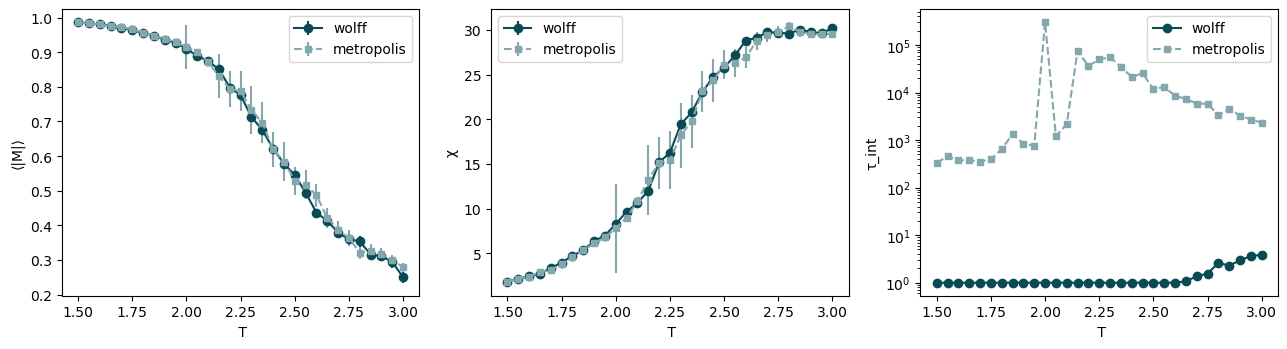

In [ ]:

from matplotlib.colors import ListedColormap

SPIN_CMAP = ListedColormap(["#094B55", "#82a8ae"])
c_dark, c_light = SPIN_CMAP.colors 
# ---------- plot ----------
fig, axs = plt.subplots(1, 3, figsize=(13, 3.6))

# ⟨|M|⟩
axs[0].errorbar(temperatures, Mw, yerr=Mw_err, fmt='o-', ms=6, label='wolff',c=c_dark)
axs[0].errorbar(temperatures, Mm, yerr=Mm_err, fmt='s--', ms=4, label='metropolis',c=c_light)
axs[0].set_xlabel(" T")
axs[0].set_ylabel("⟨|M|⟩")
axs[0].legend()

# χ
axs[1].errorbar(temperatures, Chiw, yerr=Chiw_err, fmt='o-', ms=6, label='wolff',c=c_dark)
axs[1].errorbar(temperatures, Chim, yerr=Chim_err, fmt='s--', ms=4, label='metropolis',c=c_light)
axs[1].set_xlabel(" T")
axs[1].set_ylabel("χ")
axs[1].legend()

# τ_int
axs[2].plot(temperatures, Tauw, 'o-',  ms=6, label='wolff',c=c_dark)
axs[2].plot(temperatures, Taum, 's--', ms=4, label='metropolis',c=c_light)
axs[2].set_xlabel(" T")
axs[2].set_yscale('log')
axs[2].set_ylabel("τ_int")
axs[2].legend()

# plt.savefig('ising_test')

plt.tight_layout()
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ising_lattice import IsingLattice
from monte_carlo import MonteCarlo


def run_one_method(method, temperatures, Lx, Ly, J, warmup, steps):
    Mabs_mean, Mabs_err = [], []
    Chi_mean,  Chi_err  = [], []
    Tau_list            = []

    for T in temperatures:
        lat = IsingLattice(Lx, Ly, J=J)      # J = -1.0 for ferro with your ΔE
        mc  = MonteCarlo(lat)
        mc.run_loop(warmup_steps=warmup, steps=steps, T=T, method=method)

        m = np.asarray(mc.acc.magnetization)   # raw magnetization series (can be ±)
        # order parameter
        m_abs = np.abs(m)

        acf   = mc.acc.autocorr_fft(m)                # use raw m for tau
        tau   = mc.acc.tau_int_from_acf(acf)
        Tau_list.append(tau)

        N   = m.size
        Mabs_mean.append(m_abs.mean())
        Mabs_err.append(np.sqrt(m_abs.var(ddof=1) * 2.0 * tau / N))

        Chi_mean.append(np.mean(mc.acc.susceptibility))
        Chi_err.append(np.sqrt(np.var(mc.acc.susceptibility,ddof=1) * 2.0 * tau / N))

    return (np.array(Mabs_mean), np.array(Mabs_err),
            np.array(Chi_mean),  np.array(Chi_err),
            np.array(Tau_list))

temperatures = np.linspace(1.5, 3.0, 31)
Lx = 10; Ly = 10           
J_fm = -1.0                  

# Heavier sampling for Metropolis (critical slowing down)
warmup_w = 100; steps_w = 1_000
warmup_m = 100_000; steps_m = 1_000_000

# ---------- run both ----------
Mw, Mw_err, Chiw, Chiw_err, Tauw = run_one_method("wolff",      temperatures, Lx, Ly, J_fm, warmup_w, steps_w)
Mm, Mm_err, Chim, Chim_err, Taum = run_one_method("metropolis", temperatures, Lx, Ly, J_fm, warmup_m, steps_m)



Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 2322.45it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3196.40it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3670.01it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3246.41it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3736.31it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 2938.41it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3403.20it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3097.14it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3463.33it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3135.68it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3501.67it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3167.94it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3300.13it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 2996.46it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3739.14it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3394.10it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3693.14it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3352.38it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 4035.74it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3481.42it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3931.30it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3519.48it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3783.12it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3577.40it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 4206.21it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3709.17it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3985.24it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3778.79it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 4264.11it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3912.55it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 5130.90it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 4425.92it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 4919.89it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 4832.36it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 5730.16it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 5128.62it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 6116.73it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 5634.04it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 6500.38it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 6093.27it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 7451.64it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 6505.00it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 7309.19it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 7414.07it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 9171.69it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 8175.01it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 8394.65it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 9184.54it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 9849.48it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 9576.52it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 10164.31it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 10555.51it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 14710.66it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 10676.44it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 12194.87it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 11697.77it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 15159.95it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 12444.34it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 14756.73it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 13013.62it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 17344.74it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 14338.81it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 108744.06it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [00:25<00:00, 39783.84it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 106757.84it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [00:24<00:00, 40207.79it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:01<00:00, 98793.44it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [00:24<00:00, 41086.77it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 109101.68it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [00:24<00:00, 40110.54it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 101121.83it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [00:24<00:00, 40062.79it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 110967.82it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [00:25<00:00, 39684.67it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 112006.92it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [00:23<00:00, 41841.84it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 111548.41it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [00:24<00:00, 40153.34it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 107188.41it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [00:24<00:00, 41116.06it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 112250.89it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [00:24<00:00, 40603.59it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 107177.57it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [00:25<00:00, 39568.48it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 107568.38it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [00:24<00:00, 40743.57it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 109644.46it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [00:25<00:00, 39867.06it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 112810.36it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [00:24<00:00, 40153.12it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 110088.63it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [00:25<00:00, 39962.50it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 105562.52it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [00:25<00:00, 39935.02it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 111863.26it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [00:24<00:00, 40638.62it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 103796.85it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [00:23<00:00, 41990.01it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 111629.28it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [00:23<00:00, 41781.90it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 110602.52it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [00:24<00:00, 41026.38it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 108976.47it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [00:25<00:00, 39837.14it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 116715.29it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [00:24<00:00, 40739.13it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 111291.77it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [00:24<00:00, 41203.79it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 103915.04it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [00:24<00:00, 41556.18it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 106399.81it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [00:24<00:00, 40894.00it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 109636.49it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [00:24<00:00, 40743.47it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 116144.27it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [00:24<00:00, 40794.05it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 108394.60it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [00:24<00:00, 40834.80it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:01<00:00, 91816.45it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [00:24<00:00, 40479.68it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 106553.15it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [00:24<00:00, 41158.02it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 105461.76it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [00:24<00:00, 40518.31it/s]


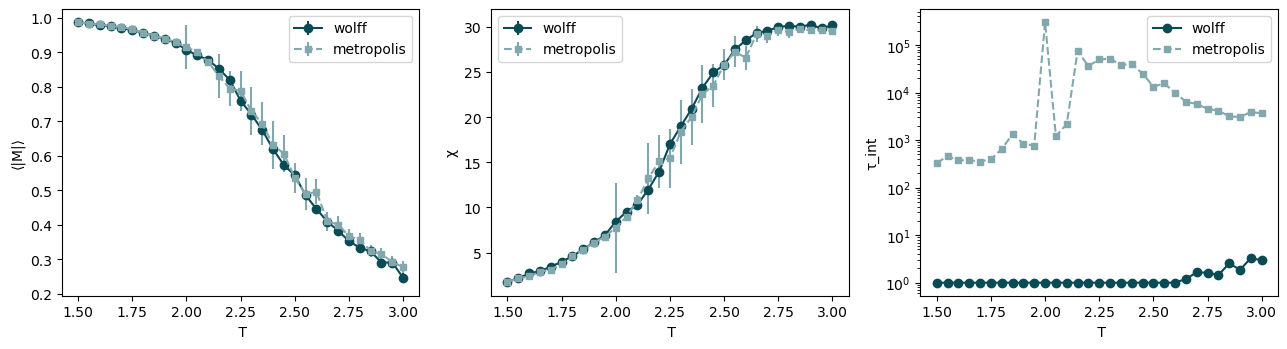

In [2]:

from matplotlib.colors import ListedColormap

SPIN_CMAP = ListedColormap(["#094B55", "#82a8ae"])
c_dark, c_light = SPIN_CMAP.colors 
# ---------- plot ----------
fig, axs = plt.subplots(1, 3, figsize=(13, 3.6))

# ⟨|M|⟩
axs[0].errorbar(temperatures, Mw, yerr=Mw_err, fmt='o-', ms=6, label='wolff',c=c_dark)
axs[0].errorbar(temperatures, Mm, yerr=Mm_err, fmt='s--', ms=4, label='metropolis',c=c_light)
axs[0].set_xlabel(" T")
axs[0].set_ylabel("⟨|M|⟩")
axs[0].legend()

# χ
axs[1].errorbar(temperatures, Chiw, yerr=Chiw_err, fmt='o-', ms=6, label='wolff',c=c_dark)
axs[1].errorbar(temperatures, Chim, yerr=Chim_err, fmt='s--', ms=4, label='metropolis',c=c_light)
axs[1].set_xlabel(" T")
axs[1].set_ylabel("χ")
axs[1].legend()

# τ_int
axs[2].plot(temperatures, Tauw, 'o-',  ms=6, label='wolff',c=c_dark)
axs[2].plot(temperatures, Taum, 's--', ms=4, label='metropolis',c=c_light)
axs[2].set_xlabel(" T")
axs[2].set_yscale('log')
axs[2].set_ylabel("τ_int")
axs[2].legend()

# plt.savefig('ising_test')

plt.tight_layout()
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lattice import Lattice
from monte_carlo import MonteCarlo
        

def run_one_method(method, temperatures, rows, cols, doping, kf, J0, warmup, steps):
    Mabs_mean, Mabs_err = [], []
    Chi_mean,  Chi_err  = [], []
    Tau_list            = []

    for T in temperatures:
        lat = Lattice(rows=rows,cols=cols,doping=doping,kf=kf,J0=J0)      # J = -1.0 for ferro with your ΔE
        mc  = MonteCarlo(lat)
        mc.run_loop(warmup_steps=warmup, steps=steps, T=T, method=method)

        m = np.asarray(mc.acc.magnetization)   # raw magnetization series (can be ±)
        # order parameter
        m_abs = np.abs(m)

        acf   = mc.acc.autocorr_fft(m)                # use raw m for tau
        tau   = mc.acc.tau_int_from_acf(acf)
        Tau_list.append(tau)

        N   = m.size
        Mabs_mean.append(m_abs.mean())
        Mabs_err.append(np.sqrt(m_abs.var(ddof=1) * 2.0 * tau / N))

        Chi_mean.append(np.mean(mc.acc.susceptibility))
        Chi_err.append(np.sqrt(np.var(mc.acc.susceptibility,ddof=1) * 2.0 * tau / N))

    return (np.array(Mabs_mean), np.array(Mabs_err),
            np.array(Chi_mean),  np.array(Chi_err),
            np.array(Tau_list))

temperatures = np.linspace(1., 12.0, 31)
rows, cols = 30, 30
doping = 0.3
kf = 0.3
J0 = -1               

# Heavier sampling for Metropolis (critical slowing down)
warmup_w = 100; steps_w = 1_000
warmup_m = 100_000; steps_m = 1_000_000

# ---------- run both ----------
Mw, Mw_err, Chiw, Chiw_err, Tauw = run_one_method("wolff",      temperatures, rows, cols, doping, kf, J0, warmup_w, steps_w)
Mm, Mm_err, Chim, Chim_err, Taum = run_one_method("metropolis", temperatures, rows, cols, doping, kf, J0, warmup_m, steps_m)



/home/lisa/Desktop/proj/monte-carlo-PtSe2/lattice.py:69: RuntimeWarning: invalid value encountered in multiply
  j1(self.kf * distances) * y1(self.kf * distances)


Starting warmup phase...


100%|██████████| 100/100 [00:01<00:00, 86.23it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:11<00:00, 87.74it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:01<00:00, 78.62it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:12<00:00, 81.54it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:01<00:00, 75.97it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:12<00:00, 77.81it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:01<00:00, 71.50it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:13<00:00, 75.71it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:01<00:00, 68.09it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:13<00:00, 73.54it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:01<00:00, 65.13it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:14<00:00, 69.58it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:01<00:00, 63.36it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:15<00:00, 66.63it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:01<00:00, 61.17it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:15<00:00, 64.23it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:01<00:00, 58.34it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:16<00:00, 61.83it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:01<00:00, 57.26it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:16<00:00, 58.95it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:01<00:00, 55.27it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:17<00:00, 57.36it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:01<00:00, 57.14it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:17<00:00, 55.57it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:01<00:00, 52.95it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:18<00:00, 54.29it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:01<00:00, 51.26it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:18<00:00, 53.72it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:01<00:00, 51.20it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:18<00:00, 53.00it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:01<00:00, 54.36it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:19<00:00, 52.37it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:01<00:00, 56.29it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:20<00:00, 49.62it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:02<00:00, 45.58it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:21<00:00, 46.50it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:01<00:00, 55.84it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:19<00:00, 52.41it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:01<00:00, 51.54it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:18<00:00, 54.77it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:01<00:00, 58.82it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:18<00:00, 54.79it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:01<00:00, 59.43it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:17<00:00, 58.76it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:01<00:00, 72.45it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:16<00:00, 61.21it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:01<00:00, 64.04it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:15<00:00, 65.24it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:01<00:00, 71.01it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:14<00:00, 69.57it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:01<00:00, 72.56it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:12<00:00, 79.67it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 104.48it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:11<00:00, 87.14it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 108.60it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:10<00:00, 98.95it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 110.04it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:08<00:00, 115.50it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 133.78it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:07<00:00, 128.13it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 154.92it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:06<00:00, 152.72it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 105730.27it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [01:33<00:00, 10717.30it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 104810.72it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [01:31<00:00, 10888.10it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:01<00:00, 89871.23it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [01:34<00:00, 10605.99it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:01<00:00, 98337.92it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [01:33<00:00, 10736.05it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 106867.54it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [01:31<00:00, 10893.84it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 107394.06it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [01:31<00:00, 10986.96it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:01<00:00, 99680.71it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [01:31<00:00, 10957.11it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 103886.60it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [01:33<00:00, 10704.23it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 103237.90it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [01:31<00:00, 10905.92it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:01<00:00, 92915.58it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [01:33<00:00, 10750.73it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 100136.92it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [01:33<00:00, 10644.11it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:01<00:00, 84335.62it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [01:34<00:00, 10570.58it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 106227.03it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [01:34<00:00, 10605.41it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:01<00:00, 86603.19it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [01:34<00:00, 10635.21it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 102237.93it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [01:32<00:00, 10803.18it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 105443.10it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [01:32<00:00, 10780.76it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 105719.58it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [01:32<00:00, 10780.01it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 110993.25it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [01:34<00:00, 10638.10it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 106997.85it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [01:32<00:00, 10755.97it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 105510.76it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [01:31<00:00, 10960.64it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 100966.16it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [01:31<00:00, 10887.84it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:01<00:00, 96086.16it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [01:33<00:00, 10713.22it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 100117.11it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [01:31<00:00, 10908.33it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:01<00:00, 93745.35it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [01:33<00:00, 10667.93it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 101806.56it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [01:32<00:00, 10828.27it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 107519.46it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [01:34<00:00, 10539.21it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 106900.52it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [01:31<00:00, 10987.66it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 102631.42it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [01:32<00:00, 10848.42it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 107832.26it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [01:33<00:00, 10652.77it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 108421.19it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [01:33<00:00, 10662.40it/s]


Starting warmup phase...


100%|██████████| 100000/100000 [00:00<00:00, 105370.94it/s]


Starting production phase...


100%|██████████| 1000000/1000000 [01:33<00:00, 10738.03it/s]


### disorder system 10x10

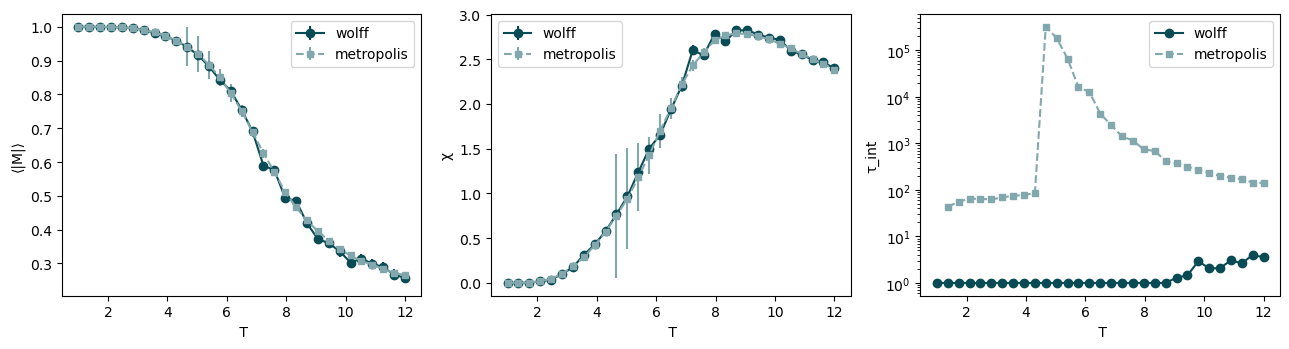

In [8]:

from matplotlib.colors import ListedColormap

SPIN_CMAP = ListedColormap(["#094B55", "#82a8ae"])
c_dark, c_light = SPIN_CMAP.colors 
# ---------- plot ----------
fig, axs = plt.subplots(1, 3, figsize=(13, 3.6))

# ⟨|M|⟩
axs[0].errorbar(temperatures, Mw, yerr=Mw_err, fmt='o-', ms=6, label='wolff',c=c_dark)
axs[0].errorbar(temperatures, Mm, yerr=Mm_err, fmt='s--', ms=4, label='metropolis',c=c_light)
axs[0].set_xlabel(" T")
axs[0].set_ylabel("⟨|M|⟩")
axs[0].legend()

# χ
axs[1].errorbar(temperatures, Chiw, yerr=Chiw_err, fmt='o-', ms=6, label='wolff',c=c_dark)
axs[1].errorbar(temperatures, Chim, yerr=Chim_err, fmt='s--', ms=4, label='metropolis',c=c_light)
axs[1].set_xlabel(" T")
axs[1].set_ylabel("χ")
axs[1].legend()

# τ_int
axs[2].plot(temperatures, Tauw, 'o-',  ms=6, label='wolff',c=c_dark)
axs[2].plot(temperatures, Taum, 's--', ms=4, label='metropolis',c=c_light)
axs[2].set_xlabel(" T")
axs[2].set_yscale('log')
axs[2].set_ylabel("τ_int")
axs[2].legend()

# plt.savefig('ising_test')

plt.tight_layout()
plt.show()

### disorder system 20x20

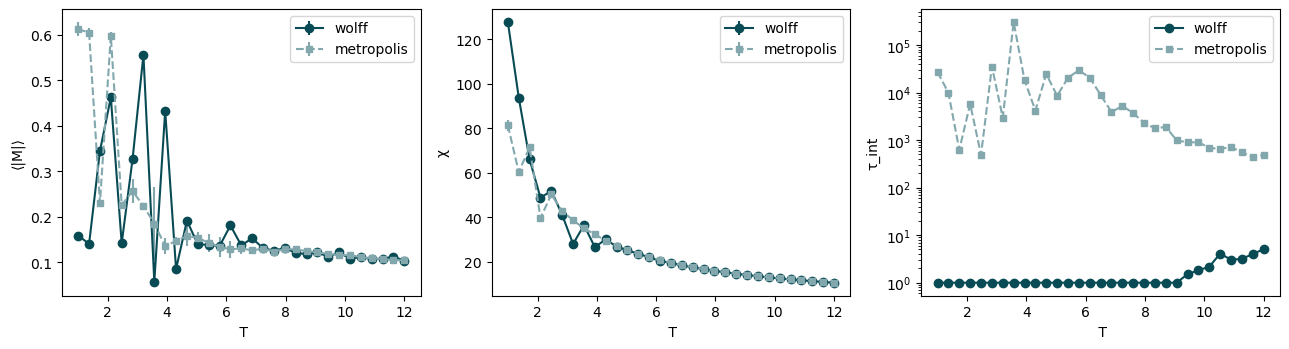

In [10]:

from matplotlib.colors import ListedColormap

SPIN_CMAP = ListedColormap(["#094B55", "#82a8ae"])
c_dark, c_light = SPIN_CMAP.colors 
# ---------- plot ----------
fig, axs = plt.subplots(1, 3, figsize=(13, 3.6))

# ⟨|M|⟩
axs[0].errorbar(temperatures, Mw, yerr=Mw_err, fmt='o-', ms=6, label='wolff',c=c_dark)
axs[0].errorbar(temperatures, Mm, yerr=Mm_err, fmt='s--', ms=4, label='metropolis',c=c_light)
axs[0].set_xlabel(" T")
axs[0].set_ylabel("⟨|M|⟩")
axs[0].legend()

# χ
axs[1].errorbar(temperatures, Chiw, yerr=Chiw_err, fmt='o-', ms=6, label='wolff',c=c_dark)
axs[1].errorbar(temperatures, Chim, yerr=Chim_err, fmt='s--', ms=4, label='metropolis',c=c_light)
axs[1].set_xlabel(" T")
axs[1].set_ylabel("χ")
axs[1].legend()

# τ_int
axs[2].plot(temperatures, Tauw, 'o-',  ms=6, label='wolff',c=c_dark)
axs[2].plot(temperatures, Taum, 's--', ms=4, label='metropolis',c=c_light)
axs[2].set_xlabel(" T")
axs[2].set_yscale('log')
axs[2].set_ylabel("τ_int")
axs[2].legend()

# plt.savefig('ising_test')

plt.tight_layout()
plt.show()

### disorder system 30x30

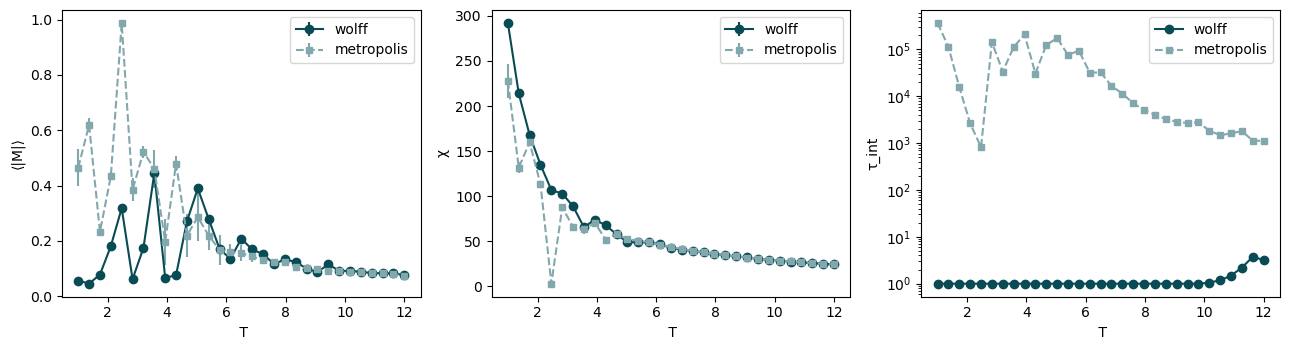

In [3]:

from matplotlib.colors import ListedColormap

SPIN_CMAP = ListedColormap(["#094B55", "#82a8ae"])
c_dark, c_light = SPIN_CMAP.colors 
# ---------- plot ----------
fig, axs = plt.subplots(1, 3, figsize=(13, 3.6))

# ⟨|M|⟩
axs[0].errorbar(temperatures, Mw, yerr=Mw_err, fmt='o-', ms=6, label='wolff',c=c_dark)
axs[0].errorbar(temperatures, Mm, yerr=Mm_err, fmt='s--', ms=4, label='metropolis',c=c_light)
axs[0].set_xlabel(" T")
axs[0].set_ylabel("⟨|M|⟩")
axs[0].legend()

# χ
axs[1].errorbar(temperatures, Chiw, yerr=Chiw_err, fmt='o-', ms=6, label='wolff',c=c_dark)
axs[1].errorbar(temperatures, Chim, yerr=Chim_err, fmt='s--', ms=4, label='metropolis',c=c_light)
axs[1].set_xlabel(" T")
axs[1].set_ylabel("χ")
axs[1].legend()

# τ_int
axs[2].plot(temperatures, Tauw, 'o-',  ms=6, label='wolff',c=c_dark)
axs[2].plot(temperatures, Taum, 's--', ms=4, label='metropolis',c=c_light)
axs[2].set_xlabel(" T")
axs[2].set_yscale('log')
axs[2].set_ylabel("τ_int")
axs[2].legend()

# plt.savefig('ising_test')

plt.tight_layout()
plt.show()

### exploring the unexpected oscillation in magnetization 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from lattice import Lattice
from monte_carlo import MonteCarlo

# magnet_m = [] #np.zeros_like((10,1_000_000))
# magnet_w = [] #np.zeros_like((10,1_000))

        

def run_one_method(method, temperatures, rows, cols, doping, kf, J0, warmup, steps):
    Mabs_mean, Mabs_err = [], []
    Chi_mean,  Chi_err  = [], []
    Tau_list            = []

    for T in temperatures:
        lat = Lattice(rows=rows,cols=cols,doping=doping,kf=kf,J0=J0)      # J = -1.0 for ferro with your ΔE
        mc  = MonteCarlo(lat)
        mc.run_loop(warmup_steps=warmup, steps=steps, T=T, method=method)

        m = np.asarray(mc.acc.magnetization)   # raw magnetization series (can be ±)
        # order parameter
        m_abs = np.abs(m)
        # if method=="metropolis":
        #     magnet_m.append(m)
        # else:
        #     magnet_w.append(m)
        

        acf   = mc.acc.autocorr_fft(m)                # use raw m for tau
        tau   = mc.acc.tau_int_from_acf(acf)
        Tau_list.append(tau)

        N   = m.size
        Mabs_mean.append(m_abs.mean())
        Mabs_err.append(np.sqrt(m_abs.var(ddof=1) * 2.0 * tau / N))

        Chi_mean.append(np.mean(mc.acc.susceptibility))
        Chi_err.append(np.sqrt(np.var(mc.acc.susceptibility,ddof=1) * 2.0 * tau / N))

    return (np.array(Mabs_mean), np.array(Mabs_err),
            np.array(Chi_mean),  np.array(Chi_err),
            np.array(Tau_list))

temperatures = [1]# np.linspace(1., 4.0, 10)
rows, cols = 10, 10
doping = 0.3
kf = 0.3
J0 = -1               

warmup_w = 1000; steps_w = 10_000
warmup_m = 100_000; steps_m = 1_000_000

# ---------- run both ----------
Mw, Mw_err, Chiw, Chiw_err, Tauw = run_one_method("wolff", temperatures, rows, cols, doping, kf, J0, warmup_w, steps_w)
# Mm, Mm_err, Chim, Chim_err, Taum = run_one_method("metropolis", temperatures, rows, cols, doping, kf, J0, warmup_m, steps_m)



/home/lisa/Desktop/proj/monte-carlo-PtSe2/lattice.py:69: RuntimeWarning: invalid value encountered in multiply
  j1(self.kf * distances) * y1(self.kf * distances)


Starting warmup phase...


100%|██████████| 1000/1000 [00:51<00:00, 19.37it/s]


GIF saved to wolff_1_warmup.gif
Starting production phase...


100%|██████████| 10000/10000 [00:01<00:00, 5170.26it/s]


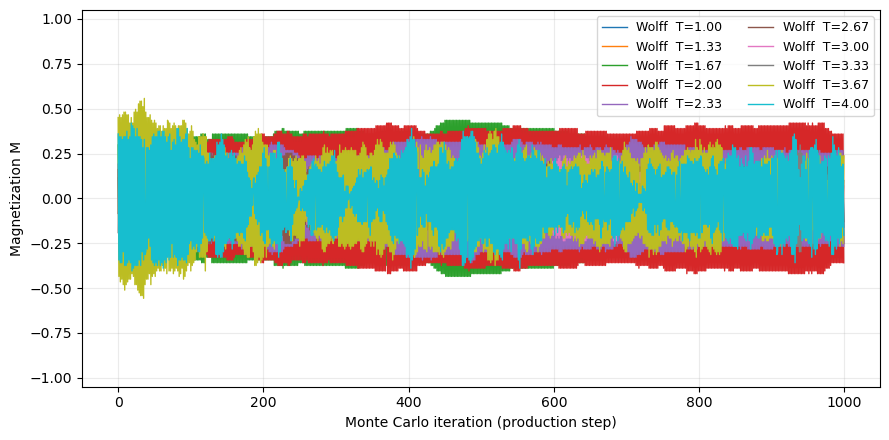

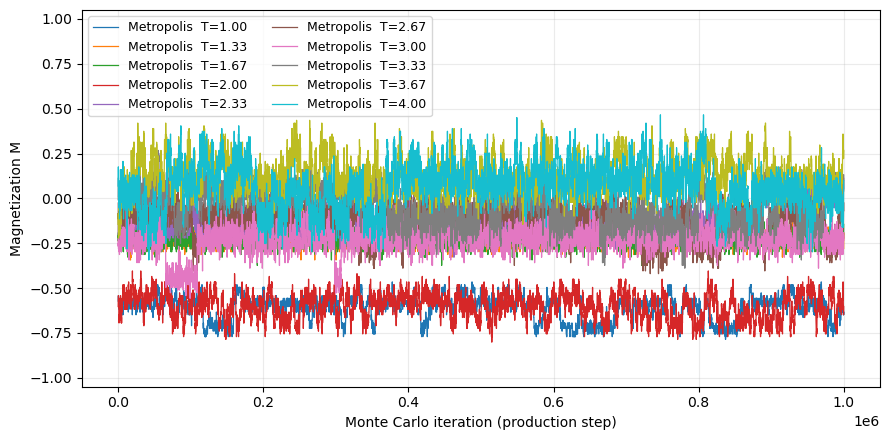

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ---- helpers ----
def thin_series(y, max_points=5000):
    n = len(y)
    if n <= max_points:
        return np.arange(n), y
    stride = int(np.ceil(n / max_points))
    return np.arange(0, n, stride), y[::stride]

xlim_w = None         
ylim_w = (-1.05, 1.05) 

xlim_m = None         
ylim_m = (-1.05, 1.05)

# ---- Wolff traces ----
plt.figure(figsize=(9, 4.5))
for T, m in zip(temperatures, magnet_w):
    x, y = thin_series(np.asarray(m), max_points=8000)
    plt.plot(x, y, lw=1.0, label=f"Wolff  T={T:.2f}")

plt.xlabel("Monte Carlo iteration (production step)")
plt.ylabel("Magnetization M")
if xlim_w: plt.xlim(*xlim_w)
if ylim_w: plt.ylim(*ylim_w)
plt.legend(ncol=2, fontsize=9)
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()

# ---- Metropolis traces ----
plt.figure(figsize=(9, 4.5))
for T, m in zip(temperatures, magnet_m):
    x, y = thin_series(np.asarray(m), max_points=8000)
    plt.plot(x, y, lw=0.9, label=f"Metropolis  T={T:.2f}")

plt.xlabel("Monte Carlo iteration (production step)")
plt.ylabel("Magnetization M")
if xlim_m: plt.xlim(*xlim_m)
if ylim_m: plt.ylim(*ylim_m)
plt.legend(ncol=2, fontsize=9)
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()


### adding physical sense

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_mc_results(temperatures, Mw, Mw_err, Mm, Mm_err,
                    Chiw, Chiw_err, Chim, Chim_err,
                    Tauw, Taum, savefile=None):
    """
    Строит графики ⟨|M|⟩, χ и τ_int для алгоритмов Wolff и Metropolis.
    """
    # цвета
    SPIN_CMAP = ListedColormap(["#094B55", "#82a8ae"])
    c_dark, c_light = SPIN_CMAP.colors 

    fig, axs = plt.subplots(1, 3, figsize=(13, 3.6))

    # ⟨|M|⟩
    axs[0].errorbar(temperatures, Mw, yerr=Mw_err, fmt='o-', ms=6,
                    label='wolff', c=c_dark)
    axs[0].errorbar(temperatures, Mm, yerr=Mm_err, fmt='s--', ms=4,
                    label='metropolis', c=c_light)
    axs[0].set_xlabel("T")
    axs[0].set_ylabel("⟨|M|⟩")
    axs[0].legend()

    # χ
    axs[1].errorbar(temperatures, Chiw, yerr=Chiw_err, fmt='o-', ms=6,
                    label='wolff', c=c_dark)
    axs[1].errorbar(temperatures, Chim, yerr=Chim_err, fmt='s--', ms=4,
                    label='metropolis', c=c_light)
    axs[1].set_xlabel("T")
    axs[1].set_ylabel("χ")
    axs[1].legend()

    # τ_int
    axs[2].plot(temperatures, Tauw, 'o-', ms=6, label='wolff', c=c_dark)
    axs[2].plot(temperatures, Taum, 's--', ms=4, label='metropolis', c=c_light)
    axs[2].set_xlabel("T")
    axs[2].set_yscale('log')
    axs[2].set_ylabel("τ_int")
    axs[2].legend()

    plt.tight_layout()
    if savefile:
        plt.savefig(savefile, dpi=150)
    plt.show()


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from lattice import Lattice
from monte_carlo import MonteCarlo
        

def run_one_method(method, temperatures, rows, cols, doping, kf, J0, warmup, steps):
    Mabs_mean, Mabs_err = [], []
    Chi_mean,  Chi_err  = [], []
    Tau_list            = []

    for T in temperatures:
        lat = Lattice(rows=rows,cols=cols,doping=doping,kf=kf,J0=J0)      # J = -1.0 for ferro with your ΔE
        mc  = MonteCarlo(lat)
        mc.run_loop(warmup_steps=warmup, steps=steps, T=T, method=method)

        m = np.asarray(mc.acc.magnetization)   # raw magnetization series (can be ±)
        # order parameter
        m_abs = np.abs(m)

        acf   = mc.acc.autocorr_fft(m)                # use raw m for tau
        tau   = mc.acc.tau_int_from_acf(acf)
        Tau_list.append(tau)

        N   = m.size
        Mabs_mean.append(m_abs.mean())
        Mabs_err.append(np.sqrt(m_abs.var(ddof=1) * 2.0 * tau / N))

        Chi_mean.append(np.mean(mc.acc.susceptibility))
        Chi_err.append(np.sqrt(np.var(mc.acc.susceptibility,ddof=1) * 2.0 * tau / N))

    return (np.array(Mabs_mean), np.array(Mabs_err),
            np.array(Chi_mean),  np.array(Chi_err),
            np.array(Tau_list))

temperatures = np.linspace(1., 12.0, 31)
rows, cols = 10, 10
doping = 0.1
kf = 0.1
J0 = -1               

# Heavier sampling for Metropolis (critical slowing down)
warmup_w = 100; steps_w = 1_000
warmup_m = 10_000; steps_m = 1_00_000

# ---------- run both ----------
Mw, Mw_err, Chiw, Chiw_err, Tauw = run_one_method("wolff",      temperatures, rows, cols, doping, kf, J0, warmup_w, steps_w)
Mm, Mm_err, Chim, Chim_err, Taum = run_one_method("metropolis", temperatures, rows, cols, doping, kf, J0, warmup_m, steps_m)



/home/lisa/Desktop/proj/monte-carlo-PtSe2/lattice.py:69: RuntimeWarning: invalid value encountered in multiply
  j1(self.kf * distances) * y1(self.kf * distances)


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 16933.68it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 15752.31it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 16757.11it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 15320.15it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 17278.29it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 15191.80it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 22933.48it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 23019.82it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 25444.70it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 24009.02it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 25857.25it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 23475.01it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 24114.90it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 24283.69it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 27026.90it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 25094.56it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 27699.80it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 25676.01it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 28061.18it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 25226.32it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 29927.25it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 24573.22it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 30231.40it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 25726.24it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 29324.65it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 24493.43it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 22427.03it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 24358.72it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 31078.13it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 23721.02it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 37200.04it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 25546.52it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 30468.57it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 27999.73it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 22489.57it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 28660.97it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 31915.26it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 28584.60it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 34039.15it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 29561.71it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 34692.34it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 29475.29it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 30190.05it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 30824.83it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 35735.74it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 32200.96it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 33072.89it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 31015.62it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 32162.44it/s]

Starting production phase...



100%|██████████| 1000/1000 [00:00<00:00, 32349.48it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 32105.82it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 31387.21it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 31763.00it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 30297.56it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 25570.35it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 27934.65it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 38085.03it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 33421.02it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 36488.07it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 33060.64it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 34683.73it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 32196.26it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 100881.12it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 69734.89it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 105943.52it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 73509.67it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 108280.34it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 72090.48it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 86917.95it/s]


Starting production phase...


 77%|███████▋  | 76744/100000 [00:01<00:00, 71108.40it/s]


KeyboardInterrupt: 

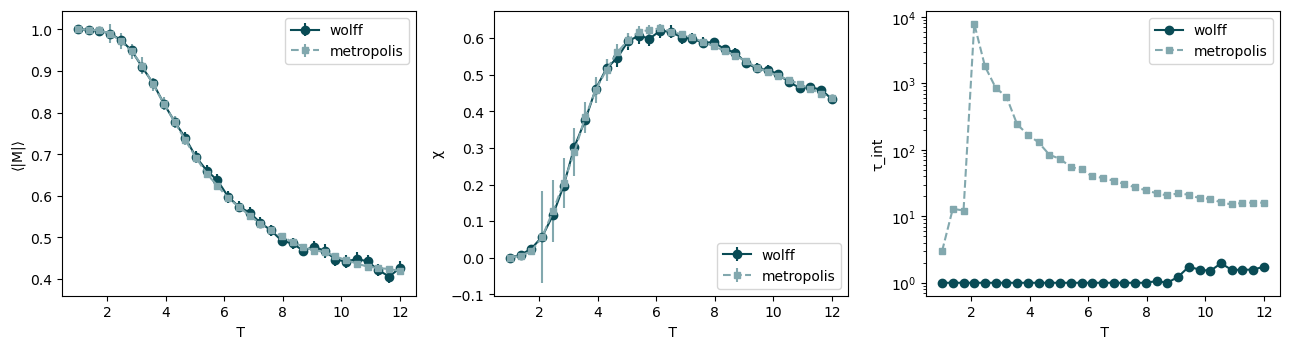

In [2]:

from matplotlib.colors import ListedColormap

SPIN_CMAP = ListedColormap(["#094B55", "#82a8ae"])
c_dark, c_light = SPIN_CMAP.colors 
# ---------- plot ----------
fig, axs = plt.subplots(1, 3, figsize=(13, 3.6))

# ⟨|M|⟩
axs[0].errorbar(temperatures, Mw, yerr=Mw_err, fmt='o-', ms=6, label='wolff',c=c_dark)
axs[0].errorbar(temperatures, Mm, yerr=Mm_err, fmt='s--', ms=4, label='metropolis',c=c_light)
axs[0].set_xlabel(" T")
axs[0].set_ylabel("⟨|M|⟩")
axs[0].legend()

# χ
axs[1].errorbar(temperatures, Chiw, yerr=Chiw_err, fmt='o-', ms=6, label='wolff',c=c_dark)
axs[1].errorbar(temperatures, Chim, yerr=Chim_err, fmt='s--', ms=4, label='metropolis',c=c_light)
axs[1].set_xlabel(" T")
axs[1].set_ylabel("χ")
axs[1].legend()

# τ_int
axs[2].plot(temperatures, Tauw, 'o-',  ms=6, label='wolff',c=c_dark)
axs[2].plot(temperatures, Taum, 's--', ms=4, label='metropolis',c=c_light)
axs[2].set_xlabel(" T")
axs[2].set_yscale('log')
axs[2].set_ylabel("τ_int")
axs[2].legend()

# plt.savefig('ising_test')

plt.tight_layout()
plt.show()

Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 2525.88it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3996.74it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 4009.31it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3858.66it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3769.79it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3665.38it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3516.32it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3345.97it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3361.68it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3118.88it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 2980.96it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 2932.93it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 2887.57it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 2805.15it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 2934.25it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 2775.00it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 2835.46it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 2598.84it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 2634.23it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 2568.50it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 2569.52it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 2515.79it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 2510.90it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 2432.91it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 2367.62it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 2487.71it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 2516.79it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 2491.50it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 2574.47it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 2541.60it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 2768.66it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 2599.41it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3005.57it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 2691.98it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 2974.98it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3068.59it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3169.17it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3366.52it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3797.02it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3653.34it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 4597.56it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3993.38it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 4354.87it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 4584.52it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 6063.67it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 5609.48it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 6256.33it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 5583.40it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 6310.36it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 6561.07it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 6734.59it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 6301.75it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 8948.04it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 7689.69it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 8567.15it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 8591.56it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 9595.31it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 7955.31it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 8171.89it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 9079.41it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 11081.97it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 9537.62it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 10535.54it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 10252.36it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 11735.93it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 10614.97it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 10098.00it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 10723.36it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 12782.84it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 10986.90it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 12935.00it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 11537.77it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 13145.40it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 11586.67it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 12592.86it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 11446.18it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 12336.19it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 12089.74it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 11940.74it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 12830.46it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 12502.02it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 12903.29it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 13740.10it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 12651.09it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 14486.60it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 12878.41it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 13500.83it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 13625.70it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 13925.77it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 14208.59it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 14476.10it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 13526.65it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 14104.66it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 14003.75it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 14364.05it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 13920.51it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 14599.04it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 13695.78it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 13719.88it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 14622.76it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 13972.16it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 14550.42it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 96796.17it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 65983.50it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 112861.45it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 65595.02it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 114637.31it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 63626.36it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 99131.05it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 65386.31it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 106014.48it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 65910.55it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 94553.62it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 63808.32it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 93904.99it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 61555.68it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 106535.53it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 62912.25it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 98963.11it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 65367.16it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 99799.75it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 63925.27it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 95055.91it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 60271.67it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 98866.07it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 64854.07it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 109642.97it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 61345.18it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 96664.11it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 59557.53it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 101238.09it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 59867.95it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 102909.27it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 58987.10it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 96501.09it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 64653.94it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 102692.33it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 64127.73it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 102187.69it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 64300.96it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 109103.36it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 61492.20it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 104842.66it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 65982.05it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 86608.35it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 64070.82it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 112123.18it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 65889.09it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 103942.13it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 62846.92it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 112311.13it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 64721.43it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 85468.79it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 65438.89it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 113939.43it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 64679.67it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 115151.26it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 65571.95it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 85704.38it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 66146.33it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 110543.98it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 64526.50it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 100039.45it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 64966.77it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 113012.89it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 66621.68it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 117374.41it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 66716.91it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 116576.77it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 67318.46it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 101281.84it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 64232.35it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 109991.16it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 57857.54it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 102902.96it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 66095.86it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 108528.30it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 66041.56it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 96497.98it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 67568.10it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 111689.66it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 66764.18it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 102850.22it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 64666.34it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 116879.86it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 64730.78it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 109701.47it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 66362.82it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 97470.32it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 63138.72it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 103901.19it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 67200.25it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 109875.62it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 66990.10it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 85955.02it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 63891.65it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 115632.53it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 67199.50it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 107439.64it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 67190.73it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 98594.62it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 67449.03it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 117136.43it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 64453.68it/s]


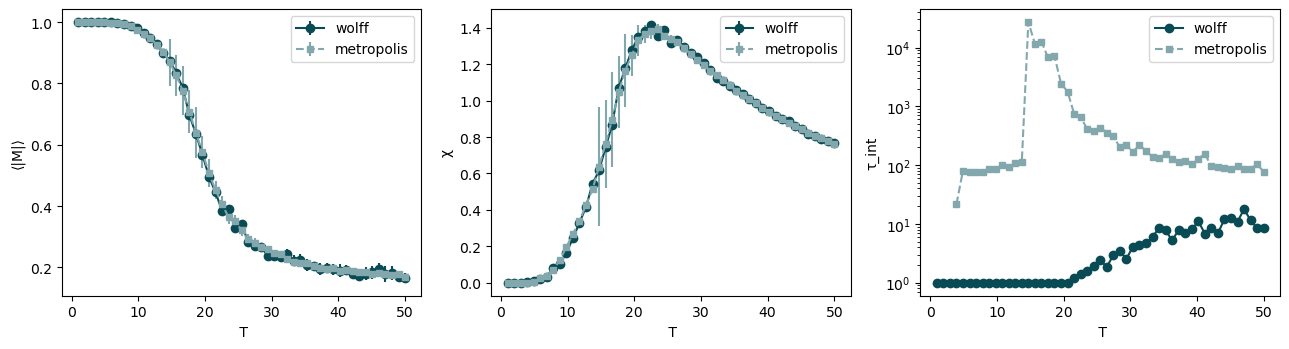

In [8]:

temperatures = np.linspace(1., 50.0, 51)
rows, cols = 20, 20
doping = 0.1
kf = 0.1
J0 = -1               

# Heavier sampling for Metropolis (critical slowing down)
warmup_w = 100; steps_w = 1_000
warmup_m = 10_000; steps_m = 1_00_000

# ---------- run both ----------
Mw, Mw_err, Chiw, Chiw_err, Tauw = run_one_method("wolff",      temperatures, rows, cols, doping, kf, J0, warmup_w, steps_w)
Mm, Mm_err, Chim, Chim_err, Taum = run_one_method("metropolis", temperatures, rows, cols, doping, kf, J0, warmup_m, steps_m)


from matplotlib.colors import ListedColormap

SPIN_CMAP = ListedColormap(["#094B55", "#82a8ae"])
c_dark, c_light = SPIN_CMAP.colors 
# ---------- plot ----------
fig, axs = plt.subplots(1, 3, figsize=(13, 3.6))

# ⟨|M|⟩
axs[0].errorbar(temperatures, Mw, yerr=Mw_err, fmt='o-', ms=6, label='wolff',c=c_dark)
axs[0].errorbar(temperatures, Mm, yerr=Mm_err, fmt='s--', ms=4, label='metropolis',c=c_light)
axs[0].set_xlabel(" T")
axs[0].set_ylabel("⟨|M|⟩")
axs[0].legend()

# χ
axs[1].errorbar(temperatures, Chiw, yerr=Chiw_err, fmt='o-', ms=6, label='wolff',c=c_dark)
axs[1].errorbar(temperatures, Chim, yerr=Chim_err, fmt='s--', ms=4, label='metropolis',c=c_light)
axs[1].set_xlabel(" T")
axs[1].set_ylabel("χ")
axs[1].legend()

# τ_int
axs[2].plot(temperatures, Tauw, 'o-',  ms=6, label='wolff',c=c_dark)
axs[2].plot(temperatures, Taum, 's--', ms=4, label='metropolis',c=c_light)
axs[2].set_xlabel(" T")
axs[2].set_yscale('log')
axs[2].set_ylabel("τ_int")
axs[2].legend()

# plt.savefig('ising_test')

plt.tight_layout()
plt.show()


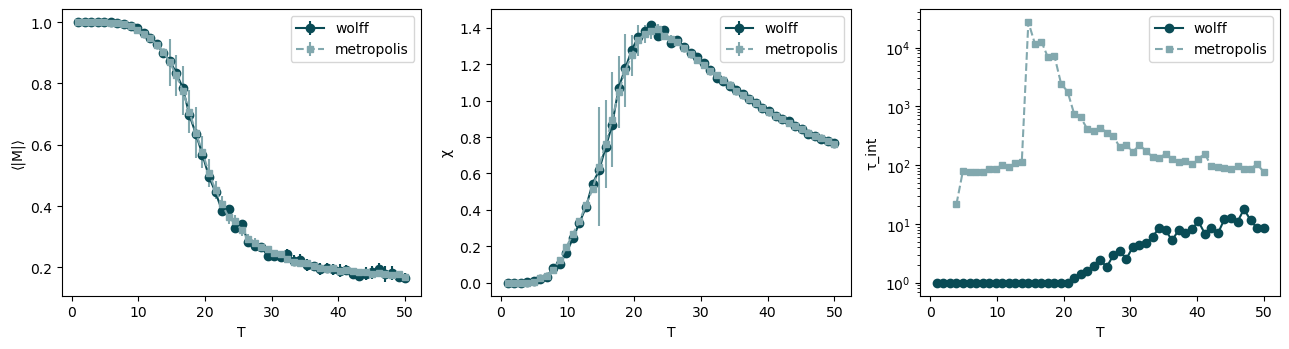

In [14]:
plot_mc_results(temperatures, Mw, Mw_err, Mm, Mm_err,
                Chiw, Chiw_err, Chim, Chim_err,
                Tauw, Taum)

In [12]:
Taum

array([           nan,            nan,            nan, 2.16615292e+01,
       8.06547273e+01, 7.49797321e+01, 7.75657049e+01, 7.77584693e+01,
       8.73616535e+01, 8.52268453e+01, 1.01794495e+02, 9.45792092e+01,
       1.09695260e+02, 1.14446876e+02, 2.71187172e+04, 1.15935330e+04,
       1.26152446e+04, 6.78436318e+03, 7.12615916e+03, 2.44008589e+03,
       1.77940405e+03, 7.48375216e+02, 6.51521711e+02, 4.13571414e+02,
       3.81905189e+02, 4.35960499e+02, 3.57926069e+02, 3.10551649e+02,
       2.00668779e+02, 2.16913044e+02, 1.69060636e+02, 2.18578408e+02,
       1.75373710e+02, 1.36881288e+02, 1.30339806e+02, 1.57399431e+02,
       1.27558625e+02, 1.13590702e+02, 1.15621656e+02, 1.03386702e+02,
       1.28371342e+02, 1.56119140e+02, 9.47585366e+01, 9.25385325e+01,
       8.76422471e+01, 8.63482740e+01, 9.67961977e+01, 8.57201319e+01,
       8.75178754e+01, 1.03416635e+02, 7.69898151e+01])

In [24]:
temperatures = np.linspace(1., 50.0, 51)
rows, cols = 30, 30
doping = 0.1
kf = 0.1
J0 = -1               

# Heavier sampling for Metropolis (critical slowing down)
warmup_w = 100; steps_w = 1_000
warmup_m = 10_000; steps_m = 1_00_000

# ---------- run both ----------
Mw, Mw_err, Chiw, Chiw_err, Tauw = run_one_method("wolff",      temperatures, rows, cols, doping, kf, J0, warmup_w, steps_w)
Mm, Mm_err, Chim, Chim_err, Taum = run_one_method("metropolis", temperatures, rows, cols, doping, kf, J0, warmup_m, steps_m)


/home/lisa/Desktop/proj/monte-carlo-PtSe2/lattice.py:69: RuntimeWarning: invalid value encountered in multiply
  j1(self.kf * distances) * y1(self.kf * distances)


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 764.63it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:01<00:00, 777.24it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 647.72it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:01<00:00, 909.07it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 873.93it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:01<00:00, 849.92it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 745.22it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:01<00:00, 784.25it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 779.55it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:01<00:00, 771.47it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 738.61it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:01<00:00, 730.46it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 682.72it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:01<00:00, 679.54it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 659.26it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:01<00:00, 649.36it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 595.89it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:01<00:00, 624.23it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 609.21it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:01<00:00, 585.43it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 580.61it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:01<00:00, 575.46it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 568.30it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:01<00:00, 557.76it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 570.38it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:01<00:00, 535.94it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 546.71it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:01<00:00, 525.56it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 536.58it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:01<00:00, 525.29it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 519.06it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:01<00:00, 514.26it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 521.59it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:01<00:00, 505.55it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 466.97it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:01<00:00, 503.53it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 543.76it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:01<00:00, 500.57it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 540.03it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:01<00:00, 534.77it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 581.92it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:01<00:00, 537.42it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 574.05it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:01<00:00, 555.17it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 569.53it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:01<00:00, 584.02it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 721.27it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:01<00:00, 654.45it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 789.91it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:01<00:00, 756.33it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 904.44it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:01<00:00, 865.17it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 1026.61it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 1071.89it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 1074.71it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 1328.65it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 1947.37it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 1536.56it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 1691.74it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 1753.50it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 2669.97it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 2304.69it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 2452.09it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 2467.03it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 2462.14it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 2926.06it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3080.49it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 2883.49it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3211.07it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3213.29it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3852.54it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3274.36it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3631.02it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3670.12it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3467.00it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 4044.61it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3664.01it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 4136.00it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 4330.50it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 4214.84it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 4287.73it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 4368.08it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 4980.83it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 4582.92it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 5422.64it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 5086.89it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 5237.12it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 5007.28it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 5142.35it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 5425.30it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 5963.24it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 5471.06it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 6520.59it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 5401.52it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 5476.95it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 5822.85it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 6645.49it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 5763.06it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 6157.32it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 5625.93it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 6859.49it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 5916.29it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 65364.83it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 39411.32it/s]
/home/lisa/Desktop/proj/monte-carlo-PtSe2/accumulator.py:144: RuntimeWarning: invalid value encountered in divide
  return acov / denom


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 79110.94it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 42706.02it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 97711.24it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 43002.55it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 108111.21it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 41832.49it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 96249.97it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 43438.64it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 109236.62it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 42763.82it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 110286.45it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 41642.42it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 104995.14it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 39505.06it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 77048.77it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 40907.24it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 98669.54it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 40977.57it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 81784.86it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 40821.68it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 104877.79it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 39174.76it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 110316.91it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 41337.88it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 97541.95it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 40470.99it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 111309.07it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 41064.24it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 104942.87it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 41253.87it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 97556.47it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 42088.16it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 107284.37it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 42068.75it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 97142.31it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 38986.98it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 95758.62it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 40551.28it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 110383.39it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 41683.78it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 111949.91it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 40875.07it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 77965.24it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 40339.99it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 83359.25it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 41785.50it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 88817.59it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 42383.18it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 99989.13it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 42747.84it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 97917.00it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 42561.92it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 101014.26it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 43424.78it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 94830.25it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 43160.19it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 96790.59it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 42903.29it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 112947.16it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 42230.39it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 111761.98it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 42111.98it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 83937.62it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 42681.89it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 100400.09it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 42112.86it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 116246.89it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 43821.63it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 111955.29it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 40897.17it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 92776.89it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 40607.65it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 108627.80it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 40505.64it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 107085.51it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 42516.45it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 113555.37it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 42511.75it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 114084.47it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 43707.18it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 103456.03it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 42695.96it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 115974.00it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 41847.67it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 113704.37it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 41697.63it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 98105.49it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 41030.04it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 110667.07it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 40101.38it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 95989.82it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 40346.60it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 103932.08it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 39800.13it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 109476.98it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 43386.20it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 106344.83it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 40702.95it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 82430.36it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 41931.76it/s]


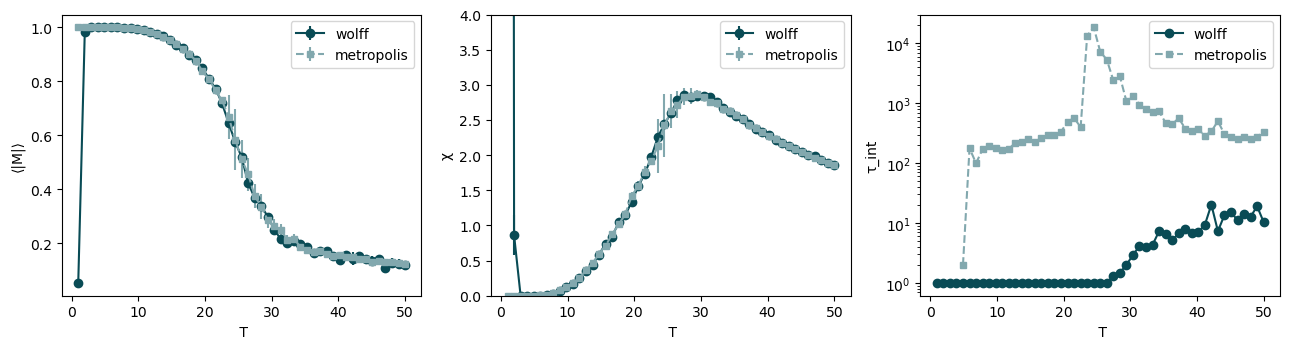

In [25]:

from matplotlib.colors import ListedColormap

SPIN_CMAP = ListedColormap(["#094B55", "#82a8ae"])
c_dark, c_light = SPIN_CMAP.colors 
# ---------- plot ----------
fig, axs = plt.subplots(1, 3, figsize=(13, 3.6))

# ⟨|M|⟩
axs[0].errorbar(temperatures, Mw, yerr=Mw_err, fmt='o-', ms=6, label='wolff',c=c_dark)
axs[0].errorbar(temperatures, Mm, yerr=Mm_err, fmt='s--', ms=4, label='metropolis',c=c_light)
axs[0].set_xlabel(" T")
axs[0].set_ylabel("⟨|M|⟩")
axs[0].legend()

# χ
axs[1].errorbar(temperatures, Chiw, yerr=Chiw_err, fmt='o-', ms=6, label='wolff',c=c_dark)
axs[1].errorbar(temperatures, Chim, yerr=Chim_err, fmt='s--', ms=4, label='metropolis',c=c_light)
axs[1].set_xlabel(" T")
axs[1].set_ylabel("χ")
axs[1].set_ylim(0,4)
axs[1].legend()

# τ_int
axs[2].plot(temperatures, Tauw, 'o-',  ms=6, label='wolff',c=c_dark)
axs[2].plot(temperatures, Taum, 's--', ms=4, label='metropolis',c=c_light)
axs[2].set_xlabel(" T")
axs[2].set_yscale('log')
axs[2].set_ylabel("τ_int")
axs[2].legend()

# plt.savefig('ising_test')

plt.tight_layout()
plt.show()

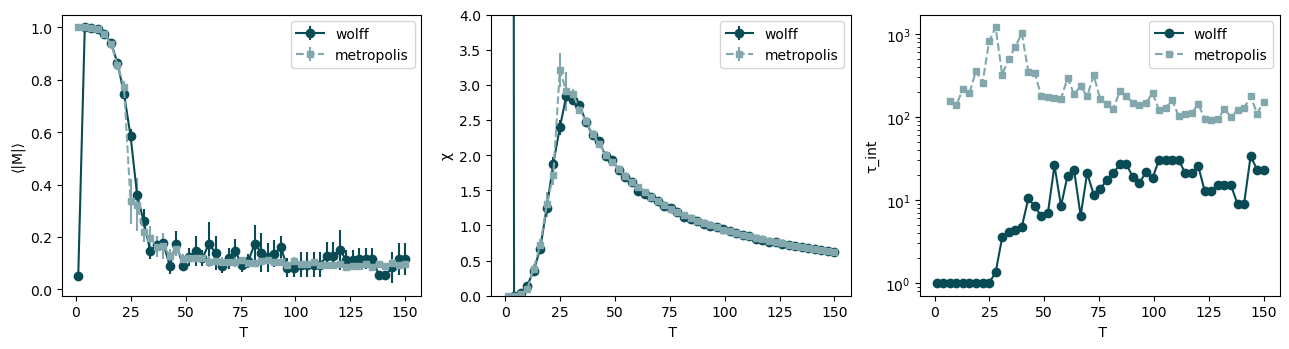

In [23]:

from matplotlib.colors import ListedColormap

SPIN_CMAP = ListedColormap(["#094B55", "#82a8ae"])
c_dark, c_light = SPIN_CMAP.colors 
# ---------- plot ----------
fig, axs = plt.subplots(1, 3, figsize=(13, 3.6))

# ⟨|M|⟩
axs[0].errorbar(temperatures, Mw, yerr=Mw_err, fmt='o-', ms=6, label='wolff',c=c_dark)
axs[0].errorbar(temperatures, Mm, yerr=Mm_err, fmt='s--', ms=4, label='metropolis',c=c_light)
axs[0].set_xlabel(" T")
axs[0].set_ylabel("⟨|M|⟩")
axs[0].legend()

# χ
axs[1].errorbar(temperatures, Chiw, yerr=Chiw_err, fmt='o-', ms=6, label='wolff',c=c_dark)
axs[1].errorbar(temperatures, Chim, yerr=Chim_err, fmt='s--', ms=4, label='metropolis',c=c_light)
axs[1].set_xlabel(" T")
axs[1].set_ylabel("χ")
axs[1].set_ylim(0,4)
axs[1].legend()

# τ_int
axs[2].plot(temperatures, Tauw, 'o-',  ms=6, label='wolff',c=c_dark)
axs[2].plot(temperatures, Taum, 's--', ms=4, label='metropolis',c=c_light)
axs[2].set_xlabel(" T")
axs[2].set_yscale('log')
axs[2].set_ylabel("τ_int")
axs[2].legend()

# plt.savefig('ising_test')

plt.tight_layout()
plt.show()

In [26]:
temperatures = np.linspace(1., 50.0, 51)
rows, cols = 40, 40
doping = 0.1
kf = 0.1
J0 = -1               

# Heavier sampling for Metropolis (critical slowing down)
warmup_w = 100; steps_w = 1_000
warmup_m = 10_000; steps_m = 1_00_000

# ---------- run both ----------
Mw, Mw_err, Chiw, Chiw_err, Tauw = run_one_method("wolff",      temperatures, rows, cols, doping, kf, J0, warmup_w, steps_w)
Mm, Mm_err, Chim, Chim_err, Taum = run_one_method("metropolis", temperatures, rows, cols, doping, kf, J0, warmup_m, steps_m)


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 320.98it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:03<00:00, 308.58it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 271.20it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:03<00:00, 267.90it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 240.58it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:03<00:00, 252.00it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 221.91it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:04<00:00, 248.84it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 172.40it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:04<00:00, 238.08it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 218.34it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:04<00:00, 227.54it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 211.95it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:04<00:00, 217.88it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 195.40it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:04<00:00, 204.05it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 206.97it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:04<00:00, 209.52it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 185.85it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:05<00:00, 186.94it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 194.46it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:05<00:00, 193.24it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 179.15it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:05<00:00, 174.68it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 180.30it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:05<00:00, 183.27it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 180.46it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:05<00:00, 179.57it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 177.11it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:05<00:00, 175.21it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 178.17it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:05<00:00, 173.97it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 169.93it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:05<00:00, 174.61it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 172.66it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:05<00:00, 170.03it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 176.40it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:05<00:00, 171.25it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 197.95it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:05<00:00, 176.38it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 178.22it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:05<00:00, 183.34it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 220.93it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:04<00:00, 205.46it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 248.29it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:04<00:00, 221.66it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 314.60it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:03<00:00, 267.47it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 310.23it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:03<00:00, 306.61it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 418.13it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:02<00:00, 361.04it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 549.02it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:02<00:00, 491.12it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 574.37it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:01<00:00, 582.17it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 707.93it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:01<00:00, 658.29it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 685.08it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:01<00:00, 781.16it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 898.21it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:01<00:00, 921.11it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 993.67it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 1040.93it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 1179.76it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 1135.97it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 1474.20it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 1363.63it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 1538.70it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 1318.72it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 1900.89it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 1655.77it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 1829.42it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 1779.98it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 2187.86it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 1960.62it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 2216.21it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 1998.69it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 2226.56it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 2292.38it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 2540.22it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 2461.72it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 2636.37it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 2394.57it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 2514.78it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 2551.55it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3489.55it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 2500.20it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 2591.62it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 2781.75it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 2887.90it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 2837.31it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 2335.57it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 2924.68it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3385.67it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3051.27it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3629.17it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3176.23it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3443.54it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3049.52it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3496.65it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3221.53it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 90214.83it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:04<00:00, 24115.75it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 80021.22it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:03<00:00, 25332.27it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 104875.17it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:03<00:00, 25693.95it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 106372.34it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:04<00:00, 24956.43it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 96457.15it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:03<00:00, 25285.49it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 86618.37it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:04<00:00, 24068.55it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 92061.71it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:03<00:00, 25038.46it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 103140.06it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:04<00:00, 24412.12it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 101794.60it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:03<00:00, 25540.50it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 88621.85it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:04<00:00, 24370.95it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 99303.32it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:04<00:00, 24469.32it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 97040.50it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:04<00:00, 24627.50it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 70391.83it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:04<00:00, 24590.11it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 102873.68it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:04<00:00, 24662.55it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 86966.79it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:04<00:00, 24135.30it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 103568.69it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:04<00:00, 24849.95it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 102240.50it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:04<00:00, 23954.62it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 87811.98it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:04<00:00, 24407.51it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 101813.63it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:03<00:00, 25110.84it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 110435.42it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:04<00:00, 24940.72it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 84002.17it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:04<00:00, 24843.89it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 96075.13it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:03<00:00, 25302.60it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 92628.96it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:03<00:00, 25072.68it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 102787.96it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:03<00:00, 25464.49it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 101637.72it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:04<00:00, 24627.68it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 95190.74it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:03<00:00, 25363.46it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 105803.75it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:04<00:00, 24423.40it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 96873.30it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:04<00:00, 24618.28it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 106029.22it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:03<00:00, 25527.14it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 105571.79it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:04<00:00, 24909.11it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 105854.22it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:04<00:00, 24766.00it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 101738.55it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:04<00:00, 24676.41it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 107610.82it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:04<00:00, 23930.55it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 104074.44it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:04<00:00, 24395.23it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 101192.66it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:04<00:00, 23699.23it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 111570.52it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:03<00:00, 25070.47it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 101051.25it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:04<00:00, 23955.69it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 81732.11it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:04<00:00, 24165.94it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 107949.27it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:04<00:00, 23814.72it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 99989.37it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:04<00:00, 23578.68it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 76556.00it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:04<00:00, 24989.13it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 104117.84it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:04<00:00, 23273.25it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 108635.96it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:04<00:00, 23439.00it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 103194.87it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:04<00:00, 23474.96it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 98190.93it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:04<00:00, 23078.25it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 97321.28it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:04<00:00, 23729.62it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 106579.12it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:03<00:00, 25444.08it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 97031.97it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:04<00:00, 24791.39it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 109970.11it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:03<00:00, 25933.90it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 108631.74it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:03<00:00, 25239.69it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 84597.55it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:04<00:00, 24214.62it/s]


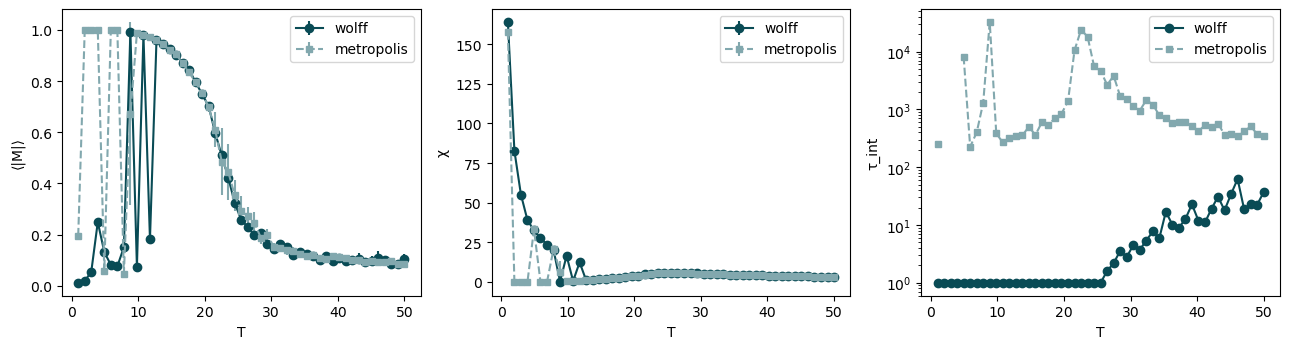

In [27]:
plot_mc_results(temperatures, Mw, Mw_err, Mm, Mm_err,
                Chiw, Chiw_err, Chim, Chim_err,
                Tauw, Taum)

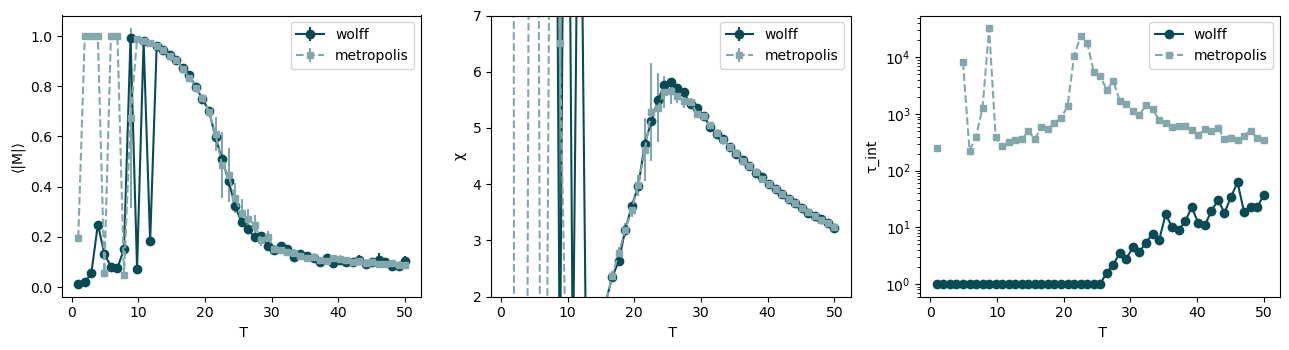

In [36]:

from matplotlib.colors import ListedColormap

SPIN_CMAP = ListedColormap(["#094B55", "#82a8ae"])
c_dark, c_light = SPIN_CMAP.colors 
# ---------- plot ----------
fig, axs = plt.subplots(1, 3, figsize=(13, 3.6))

# ⟨|M|⟩
axs[0].errorbar(temperatures, Mw, yerr=Mw_err, fmt='o-', ms=6, label='wolff',c=c_dark)
axs[0].errorbar(temperatures, Mm, yerr=Mm_err, fmt='s--', ms=4, label='metropolis',c=c_light)
axs[0].set_xlabel(" T")
axs[0].set_ylabel("⟨|M|⟩")
axs[0].legend()

# χ
axs[1].errorbar(temperatures, Chiw, yerr=Chiw_err, fmt='o-', ms=6, label='wolff',c=c_dark)
axs[1].errorbar(temperatures, Chim, yerr=Chim_err, fmt='s--', ms=4, label='metropolis',c=c_light)
axs[1].set_xlabel(" T")
axs[1].set_ylabel("χ")
axs[1].set_ylim(2,7)
# axs[1].set_xlim(15,35)
axs[1].legend()

# τ_int
axs[2].plot(temperatures, Tauw, 'o-',  ms=6, label='wolff',c=c_dark)
axs[2].plot(temperatures, Taum, 's--', ms=4, label='metropolis',c=c_light)
axs[2].set_xlabel(" T")
axs[2].set_yscale('log')
axs[2].set_ylabel("τ_int")
axs[2].legend()

# plt.savefig('ising_test')

plt.tight_layout()
plt.show()

In [8]:
import numpy as np
temperatures = np.linspace(1., 50.0, 51)
rows, cols = 10, 10
doping = 0.05
kf = 0.1
J0 = -1               

# Heavier sampling for Metropolis (critical slowing down)
warmup_w = 100; steps_w = 1_000
warmup_m = 10_000; steps_m = 1_00_000

# ---------- run both ----------
Mw, Mw_err, Chiw, Chiw_err, Tauw = run_one_method("wolff",      temperatures, rows, cols, doping, kf, J0, warmup_w, steps_w)
Mm, Mm_err, Chim, Chim_err, Taum = run_one_method("metropolis", temperatures, rows, cols, doping, kf, J0, warmup_m, steps_m)




Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 24575.52it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 25191.32it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 31753.38it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 28334.53it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 31261.12it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 29049.85it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 30521.79it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 23772.79it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 28079.96it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 28152.90it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 35953.23it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 27327.66it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 37332.48it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 26226.53it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 32883.61it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 27722.50it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 31607.42it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 23406.76it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 33383.51it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 26739.50it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 29700.50it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 26719.40it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 34371.09it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 24809.56it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 33849.60it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 36753.45it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 49171.21it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 37360.41it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 30669.08it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 28812.77it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 32699.03it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 39404.23it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 48271.42it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 41832.60it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 36650.68it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 27276.30it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 51237.53it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 37811.73it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 34764.23it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 29793.11it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 33586.68it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 34152.51it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 33319.86it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 37322.85it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 58842.65it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 40496.90it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 46397.17it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 44049.49it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 49725.00it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 41893.19it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 30198.75it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 44544.44it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 47978.77it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 39507.41it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 46634.47it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 38619.81it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 46921.40it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 39401.63it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 47619.26it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 41732.71it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 50643.61it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 39997.56it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 40900.09it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 43311.69it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 42877.78it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 47351.53it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 49027.52it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 41163.00it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 51768.75it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 41125.47it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 49338.95it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 41244.77it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 47657.13it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 47563.63it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 35287.77it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 44582.31it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 43878.06it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 40914.05it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 51711.31it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 37723.65it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 48725.65it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 43545.51it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 50466.90it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 41234.63it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 50680.33it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 46583.71it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 43745.35it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 37595.16it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 44935.76it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 41775.94it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 57346.24it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 38475.62it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 48121.89it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 31627.67it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 48663.46it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 44555.32it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 59485.24it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 36482.36it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 52745.27it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 41905.74it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 41177.15it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 40653.51it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 73893.08it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 75118.49it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 114340.73it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 70422.24it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 91661.35it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 74781.67it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 101118.98it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 73077.07it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 104278.07it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 74751.75it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 107535.23it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 73715.18it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 106196.47it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 75725.85it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 114938.26it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 76131.74it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 115972.71it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 78008.79it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 113021.12it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 72482.11it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 123841.59it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 76772.87it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 119884.18it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 76849.27it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 118405.90it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 75259.49it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 105849.94it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 77528.44it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 106179.27it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 75533.96it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 113360.18it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 75886.01it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 106500.37it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 76272.64it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 113047.62it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 78141.64it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 108069.42it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 78283.33it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 120702.17it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 77015.72it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 106090.64it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 73318.25it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 113245.10it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 75724.85it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 122615.73it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 73183.43it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 106119.63it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 71497.59it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 99403.81it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 76053.86it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 123056.05it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 76263.73it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 113648.30it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 72762.80it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 118162.39it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 74614.40it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 108299.35it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 75644.26it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 116432.12it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 75610.16it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 105806.15it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 74490.15it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 112004.02it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 72617.54it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 116917.33it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 75237.90it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 111446.31it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 76337.06it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 120184.07it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 77838.84it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 106385.02it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 77577.54it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 105490.28it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 70642.18it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 104525.47it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 76331.78it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 106182.49it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 76674.49it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 111517.42it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 76291.77it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 106490.36it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 70338.39it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 106979.27it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 76115.41it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 104184.57it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 76342.97it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 106841.38it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 74273.33it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 106395.82it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 76480.56it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 114635.12it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 76056.31it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 87601.98it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 70817.23it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 120023.12it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 71357.48it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 106726.65it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 77476.20it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 118747.49it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 73654.76it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 118866.96it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 74670.14it/s]


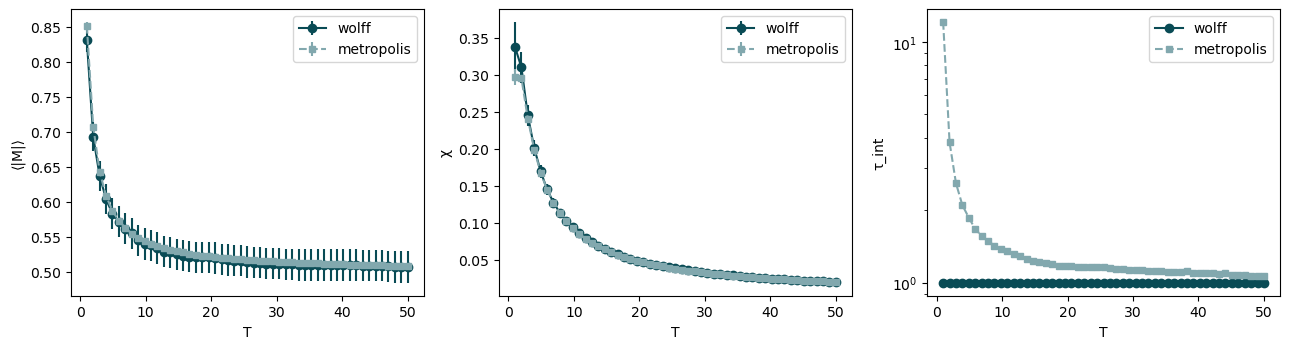

In [9]:
plot_mc_results(temperatures, Mw, Mw_err, Mm, Mm_err,
                Chiw, Chiw_err, Chim, Chim_err,
                Tauw, Taum)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_mc_results_with_curie(temperatures, Mw, Mw_err, Mm, Mm_err,
                               Chiw, Chiw_err, Chim, Chim_err,
                               Tauw, Taum, savefile=None):
    """
    Основные 3 панели + Curie-представления:
    (i) chi vs 1/T и (ii) 1/chi vs T (для Кюри–Вейса).
    """
    SPIN_CMAP = ListedColormap(["#094B55", "#82a8ae"])
    c_dark, c_light = SPIN_CMAP.colors
    T = np.asarray(temperatures, float)
    invT = 1.0 / T

    # ---------- 3 панели ----------
    fig, axs = plt.subplots(1, 3, figsize=(13, 3.6))

    # <|M|>
    axs[0].errorbar(T, Mw, yerr=Mw_err, fmt='o-', ms=6, label='wolff', c=c_dark)
    axs[0].errorbar(T, Mm, yerr=Mm_err, fmt='s--', ms=4, label='metropolis', c=c_light)
    axs[0].set_xlabel("T"); axs[0].set_ylabel("⟨|M|⟩"); axs[0].legend()

    # chi(T)
    axs[1].errorbar(T, Chiw, yerr=Chiw_err, fmt='o-', ms=6, label='wolff', c=c_dark)
    axs[1].errorbar(T, Chim, yerr=Chim_err, fmt='s--', ms=4, label='metropolis', c=c_light)
    axs[1].set_xlabel("T"); axs[1].set_ylabel("χ"); axs[1].legend()

    # tau_int(T)
    axs[2].plot(T, Tauw, 'o-',  ms=6, label='wolff', c=c_dark)
    axs[2].plot(T, Taum, 's--', ms=4, label='metropolis', c=c_light)
    axs[2].set_xlabel("T"); axs[2].set_yscale('log'); axs[2].set_ylabel("τ_int"); axs[2].legend()

    plt.tight_layout()
    if savefile: plt.savefig(savefile, dpi=150)
    plt.show()

    # ---------- Curie views ----------
    fig2, axs2 = plt.subplots(1, 2, figsize=(9.5, 3.6))

    # (A) chi vs 1/T
    axs2[0].errorbar(invT, Chiw, yerr=Chiw_err, fmt='o-', ms=6, label='wolff', c=c_dark)
    axs2[0].errorbar(invT, Chim, yerr=Chim_err, fmt='s--', ms=4, label='metropolis', c=c_light)
    axs2[0].set_xlabel("1/T"); axs2[0].set_ylabel("χ"); axs2[0].legend()
    axs2[0].invert_xaxis()  # по желанию: чтобы рост T шёл вправо

    # (B) 1/chi vs T  (для Кюри–Вейса)
    def inv_with_err(chi, err):
        chi = np.asarray(chi, float); err = np.asarray(err, float)
        m = chi > 0
        invchi = np.full_like(chi, np.nan, dtype=float)
        invchi[m] = 1.0 / chi[m]
        invchi_err = np.full_like(err, np.nan, dtype=float)
        invchi_err[m] = err[m] / (chi[m]**2)   # линейная пропагация
        return invchi, invchi_err, m

    inv_chiw, inv_chiw_err, m_w = inv_with_err(Chiw, Chiw_err)
    inv_chim, inv_chim_err, m_m = inv_with_err(Chim, Chim_err)

    axs2[1].errorbar(T[m_w], inv_chiw[m_w], yerr=inv_chiw_err[m_w],
                     fmt='o-', ms=6, label='wolff', c=c_dark)
    axs2[1].errorbar(T[m_m], inv_chim[m_m], yerr=inv_chim_err[m_m],
                     fmt='s--', ms=4, label='metropolis', c=c_light)
    axs2[1].set_xlabel("T"); axs2[1].set_ylabel("1/χ"); axs2[1].legend()

    plt.tight_layout()
    plt.show()


import numpy as np

def curie_weiss_fit(T, chi, chi_err=None, q_grid=range(55, 90, 5)):
    """
    Fit 1/chi = a*T + b on the paramagnetic (high-T) window.
    Returns dict with Tc=-b/a, C=1/a, (a,b), chi2_dof, chosen Tmin, and mask.
    """
    T   = np.asarray(T, float)
    chi = np.asarray(chi, float)
    mpos = chi > 0
    T, chi = T[mpos], chi[mpos]
    if chi_err is None:
        chi_err = np.full_like(chi, np.nan)
    else:
        chi_err = np.asarray(chi_err, float)[mpos]

    inv_chi = 1.0 / chi
    # пропагация ошибок: sigma(1/chi) = sigma(chi)/chi^2
    inv_err = np.where(np.isfinite(chi_err), chi_err / (chi**2), np.nan)

    best = None
    for q in q_grid:
        Tmin = np.percentile(T, q)
        mask = T >= Tmin
        if mask.sum() < 6:
            continue

        x = T[mask]
        y = inv_chi[mask]
        w = 1.0 / (inv_err[mask]**2) if np.isfinite(inv_err[mask]).all() else None

        # взвешенная линейная регрессия
        if w is None:
            A = np.vstack([x, np.ones_like(x)]).T
            a, b = np.linalg.lstsq(A, y, rcond=None)[0]
            yfit = a*x + b
            # chi^2 без весов
            chi2 = np.sum((y - yfit)**2)
            dof  = max(1, x.size - 2)
        else:
            # нормируем на веса
            sw  = np.sqrt(w)
            Ax  = (x * sw)[:, None]
            A1  = sw[:, None]
            A   = np.hstack([Ax, A1])
            yw  = y * sw
            a, b = np.linalg.lstsq(A, yw, rcond=None)[0]
            yfit = a*x + b
            chi2 = np.sum(w * (y - yfit)**2)
            dof  = max(1, x.size - 2)

        chi2_dof = chi2 / dof
        if (best is None) or (chi2_dof < best["chi2_dof"]):
            best = {
                "a": a, "b": b, "chi2_dof": chi2_dof,
                "Tmin": Tmin, "mask": (mpos.nonzero()[0][mask])  # индексы относительно входа
            }

    if best is None:
        raise RuntimeError("Нет устойчивого окна для линейного фита Curie–Weiss.")

    a, b = best["a"], best["b"]
    Tc = -b / a
    C  = 1.0 / a
    best.update({"Tc": Tc, "C": C})
    return best


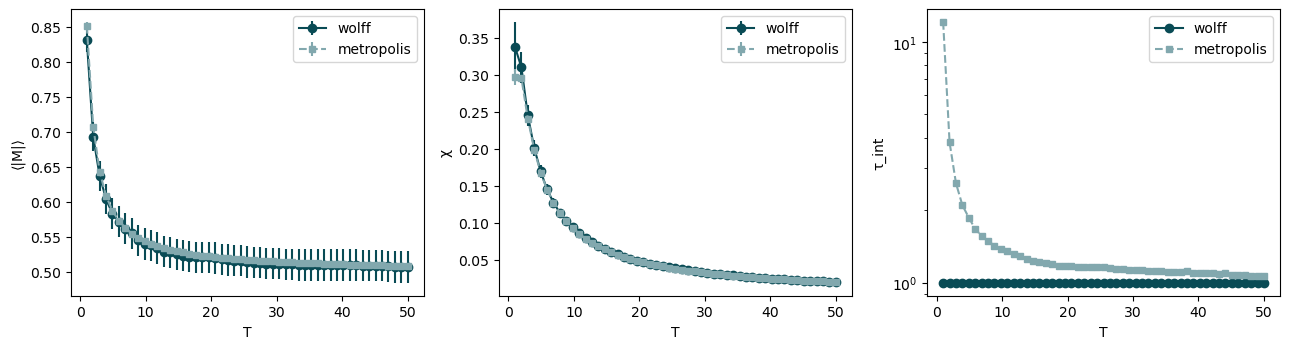

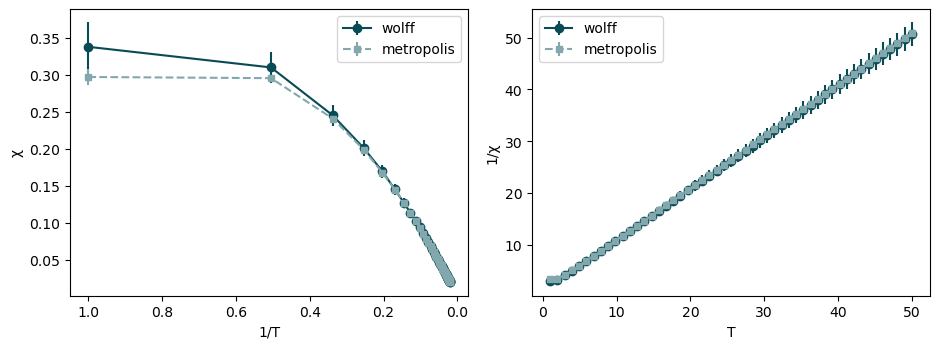

In [11]:
plot_mc_results_with_curie(temperatures, Mw, Mw_err, Mm, Mm_err,
                               Chiw, Chiw_err, Chim, Chim_err,
                               Tauw, Taum, savefile=None)

In [13]:
# для Wolff:
res_w = curie_weiss_fit(temperatures, Chiw, Chiw_err)
print("Wolff: Tc ≈ {:.3f},  C ≈ {:.3f},  chi2/dof ≈ {:.2f},  Tmin ≈ {:.2f}"
      .format(res_w["Tc"], res_w["C"], res_w["chi2_dof"], res_w["Tmin"]))

# для Metropolis:
res_m = curie_weiss_fit(temperatures, Chim, Chim_err)
print("Metro: Tc ≈ {:.3f},  C ≈ {:.3f},  chi2/dof ≈ {:.2f},  Tmin ≈ {:.2f}"
      .format(res_m["Tc"], res_m["C"], res_m["chi2_dof"], res_m["Tmin"]))


Wolff: Tc ≈ -1.479,  C ≈ 1.015,  chi2/dof ≈ 0.00,  Tmin ≈ 40.20
Metro: Tc ≈ -0.990,  C ≈ 1.002,  chi2/dof ≈ 0.00,  Tmin ≈ 42.65


In [1]:
import numpy as np

# ---------- S(q) из матрицы корреляций (acc.correlation_matrix/steps) ----------
# def structure_factor_from_corr(lattice, corr, qn=64):
#     coords = lattice.coords
#     x, y = coords[:,0], coords[:,1]
#     Lx, Ly = lattice.Lx, lattice.Ly

#     qx = 2*np.pi * np.linspace(-qn//2, qn//2-1, qn) / Lx
#     qy = 2*np.pi * np.linspace(-qn//2, qn//2-1, qn) / Ly
#     Qx, Qy = np.meshgrid(qx, qy, indexing='ij')

#     # exp(-iq·(ri-rj)) = exp(-iq·ri) * exp(+iq·rj)
#     phase_i = np.exp(-1j*(x[:,None,None]*Qx[None,:,:] + y[:,None,None]*Qy[None,:,:]))
#     phase_j = np.conjugate(phase_i)
#     # S(q) = sum_ij <SiSj> e^{-iq(ri-rj)}
#     S = np.einsum('ij,iqp,jqp->qp', corr, phase_i, phase_j, optimize=True).real
#     return qx, qy, S



def structure_factor_from_corr(lattice, corr, qn=64):
    """
    Возвращает (qx, qy, S), где S(q) = sum_{ij} <Si Sj> e^{-iq·(ri-rj)}.
    Работает:
      - с нерегулярной решёткой: lattice.coords = [[x_i, y_i], ...]
      - с квадратной решёткой Изинга: координаты берутся из index_to_coords.
    """
    # --- координаты узлов ---
    if hasattr(lattice, "coords") and lattice.coords is not None:
        coords = np.asarray(lattice.coords, float)
        x, y = coords[:, 0], coords[:, 1]
    else:
        # обычная квадратная решётка: восстановим (x,y) по индексу
        xs, ys = [], []
        for i in range(lattice.N):
            xi, yi = lattice.index_to_coords(i)
            xs.append(xi); ys.append(yi)
        x = np.asarray(xs, float); y = np.asarray(ys, float)

    Lx = float(lattice.Lx)
    Ly = float(lattice.Ly)

    # --- сетка волновых чисел ---
    qx = 2.0 * np.pi * np.linspace(-qn//2, qn//2 - 1, qn) / Lx
    qy = 2.0 * np.pi * np.linspace(-qn//2, qn//2 - 1, qn) / Ly
    Qx, Qy = np.meshgrid(qx, qy, indexing="ij")

    # exp(-i q·r) для всех узлов и всех q
    phase_i = np.exp(-1j * (x[:, None, None] * Qx[None, :, :] +
                            y[:, None, None] * Qy[None, :, :]))
    # conj для r_j
    phase_j = np.conjugate(phase_i)

    # S(q) = sum_{i,j} <Si Sj> e^{-iq·(ri-rj)}
    S = np.einsum("ij,iqp,jqp->qp", corr, phase_i, phase_j, optimize=True).real

    # (необязательно) нормировка на N: раскомментируй при желании
    # S /= lattice.N

    return qx, qy, S


# ---------- поиск q* и типа порядка ----------
def detect_order_qstar(lattice, corr, qn=64, q0_thr=1e-6):
    qx, qy, S = structure_factor_from_corr(lattice, corr, qn=qn)
    k = np.argmax(S)
    i, j = np.unravel_index(k, S.shape)
    qstar = np.array([qx[i], qy[j]])
    order = "FM" if np.hypot(*qstar) < q0_thr else "AFM"
    return order, qstar, (qx, qy, S)

# ---------- параболическая оценка T_peak ----------
def peak_T_parabolic(T, Y):
    k = int(np.argmax(Y))
    k1 = max(0, k-1); k2 = k; k3 = min(len(T)-1, k+1)
    x = np.array([T[k1], T[k2], T[k3]], float)
    y = np.array([Y[k1], Y[k2], Y[k3]], float)
    # fit y = ax^2 + bx + c
    A = np.vstack([x**2, x, np.ones_like(x)]).T
    a, b, c = np.linalg.lstsq(A, y, rcond=None)[0]
    # вершина параболы
    if a < 0:
        Tpeak = -b/(2*a)
    else:
        Tpeak = T[k2]
    return Tpeak

# # ---------- основной цикл по T: собираем χ(T) и S(q*)(T) ----------
# def sweep_and_Tc(monte_carlo, T_grid, steps_warm=2_000, steps_prod=10_000, method="wolff",
#                  qn=64):
#     lat = monte_carlo.lattice
#     Chi = []; Chi_err = []; Smax = []; qstars = []
#     # на каждой T корр-матрица должна сбрасываться
#     for T in T_grid:
#         monte_carlo.acc.correlation_matrix[:] = 0.0
#         monte_carlo.run_loop(steps_warm, steps_prod, T, method=method, save_warmup=False)
#         # χ стандартная (если понадобится для FM)
#         M = np.asarray(monte_carlo.acc.magnetization)
#         chi = (lat.N/T)*(np.mean(M**2) - np.mean(M)**2)
#         Chi.append(chi)
#         Chi_err.append(monte_carlo.acc.calculate_error(M, monte_carlo.acc.magnetization_tau_int) * (lat.N/T))

#         # усреднённая корреляция
#         corr = monte_carlo.acc.correlation_matrix / steps_prod
#         qx, qy, S = structure_factor_from_corr(lat, corr, qn=qn)
#         Smax.append(S.max())
#         # сохраним q* только для самой низкой T
#         if T == T_grid[0]:
#             order, qstar, _ = detect_order_qstar(lat, corr, qn=qn)
#             qstars.append((order, qstar))
#     order, qstar = qstars[0]
#     Chi = np.array(Chi); Smax = np.array(Smax)

#     if order == "FM":
#         # берём пик χ(T)
    #     Tc = peak_T_parabolic(np.array(T_grid), Chi)
    #     series_used = ("chi", Chi)
    # else:
    #     # для АФМ: χ_q ≈ S(q*)/T. Пересчитаем S(q*) для каждой T
    #     ChiQ = []
    #     for T in T_grid:
    #         corr = monte_carlo.acc.correlation_matrix / steps_prod  # уже есть от последнего T, поэтому пересчитаем в цикле:
    #         monte_carlo.acc.correlation_matrix[:] = 0.0
    #         monte_carlo.run_loop(0, 2_000, T, method=method, save_warmup=False)  # краткий добор для S(q)
    #         corr = monte_carlo.acc.correlation_matrix / 2_000
    #         qx, qy, S = structure_factor_from_corr(lat, corr, qn=qn)
    #         # найдём ближайший индекс к q*
    #         ix = np.argmin(np.abs(qx - qstar[0]))
    #         iy = np.argmin(np.abs(qy - qstar[1]))
    #         ChiQ.append(S[ix, iy] / T)
    #     ChiQ = np.array(ChiQ)
    #     Tc = peak_T_parabolic(np.array(T_grid), ChiQ)
    #     series_used = ("chi_q", ChiQ)

    # return {
    #     "order": order,
    #     "qstar": qstar,
    #     "Tc_est": Tc,
    #     "series_used": series_used,   # что именно максимизировали
    # }


In [15]:
import numpy as np
temperatures = np.linspace(1., 50.0, 51)
rows, cols = 10, 10
doping = 0.3
kf = 0.1
J0 = -1               

# Heavier sampling for Metropolis (critical slowing down)
warmup_w = 100; steps_w = 1_000
warmup_m = 10_000; steps_m = 1_00_000

# ---------- run both ----------
Mw, Mw_err, Chiw, Chiw_err, Tauw = run_one_method("wolff",      temperatures, rows, cols, doping, kf, J0, warmup_w, steps_w)
Mm, Mm_err, Chim, Chim_err, Taum = run_one_method("metropolis", temperatures, rows, cols, doping, kf, J0, warmup_m, steps_m)




Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3705.80it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3826.68it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3636.72it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3626.95it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3394.19it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3743.69it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 5487.77it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 5261.53it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 5010.64it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 4919.08it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 4962.15it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 4762.51it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 4795.30it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 4631.18it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 4297.05it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 4543.14it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 4495.50it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 4415.88it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 4380.11it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 4248.40it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 4177.51it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 4012.69it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3865.82it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 4008.97it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3580.47it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3788.93it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3824.97it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3796.81it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3604.04it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3662.39it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3803.67it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3578.78it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3666.70it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3531.76it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3667.12it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3557.12it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3617.56it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3598.95it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3728.73it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3529.07it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3716.64it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3674.19it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 3627.10it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3720.64it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 4101.37it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 3880.03it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 4259.60it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 4035.43it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 4133.13it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 4214.55it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 4462.50it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 4550.27it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 5436.56it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 4862.16it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 4919.02it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 5290.87it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 6380.24it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 5704.29it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 6842.59it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 6467.90it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 6549.40it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 6566.73it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 7524.09it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 6642.82it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 7686.80it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 7346.25it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 8002.87it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 7789.26it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 9128.77it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 8301.87it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 9449.82it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 8790.73it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 9403.21it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 9223.10it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 10394.55it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 9728.65it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 11496.28it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 10183.64it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 11269.56it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 10940.36it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 9948.07it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 11042.55it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 10282.17it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 11125.50it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 12014.62it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 11180.13it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 13298.79it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 12047.65it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 12824.26it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 12915.09it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 12021.16it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 12496.62it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 12190.62it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 12878.88it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 14064.46it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 12958.18it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 14234.39it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 13855.07it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 14476.60it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 12401.96it/s]


Starting warmup phase...


100%|██████████| 100/100 [00:00<00:00, 13963.79it/s]


Starting production phase...


100%|██████████| 1000/1000 [00:00<00:00, 13873.22it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 111806.96it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 70574.10it/s]
/home/lisa/Desktop/proj/monte-carlo-PtSe2/accumulator.py:144: RuntimeWarning: invalid value encountered in divide
  return acov / denom


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 103984.39it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 70234.33it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 102487.83it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 67336.15it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 96447.83it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 70390.35it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 110728.71it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 68916.31it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 89259.50it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 68377.85it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 101217.81it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 69900.34it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 83040.40it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 67763.00it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 94776.89it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 69376.84it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 110735.14it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 69191.07it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 84719.04it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 64884.99it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 104576.29it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 66343.25it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 116673.41it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 70395.57it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 103890.90it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 67089.43it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 76811.72it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 70509.92it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 117879.45it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 66531.85it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 113737.36it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 69679.90it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 110522.72it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 70372.95it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 76144.75it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 70332.11it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 70372.93it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 70344.72it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 92230.75it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 69876.31it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 99992.23it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 70731.03it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 110046.86it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 70486.82it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 106504.70it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 70603.76it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 89022.50it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 64399.91it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 113257.33it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 69985.75it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 103325.03it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 70568.23it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 81180.97it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 71386.26it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 110132.68it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 70359.08it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 103329.87it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 71728.10it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 119538.75it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 70775.38it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 114505.24it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 71597.18it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 104150.94it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 70368.27it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 107531.64it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 71936.67it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 115249.35it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 69997.63it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 111177.19it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 67047.63it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 115741.98it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 71033.30it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 107031.13it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 71429.33it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 111950.21it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 70794.42it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 119770.87it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 71680.68it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 95867.61it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 70235.88it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 103781.90it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 70434.83it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 113643.06it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 70139.60it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 108702.69it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 71075.27it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 110875.65it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 71085.38it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 93596.74it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 71595.17it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 109969.82it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 70740.71it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 83723.99it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 71645.94it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 116865.86it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 68505.85it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 103575.08it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 71804.92it/s]


Starting warmup phase...


100%|██████████| 10000/10000 [00:00<00:00, 93625.99it/s]


Starting production phase...


100%|██████████| 100000/100000 [00:01<00:00, 71131.72it/s]


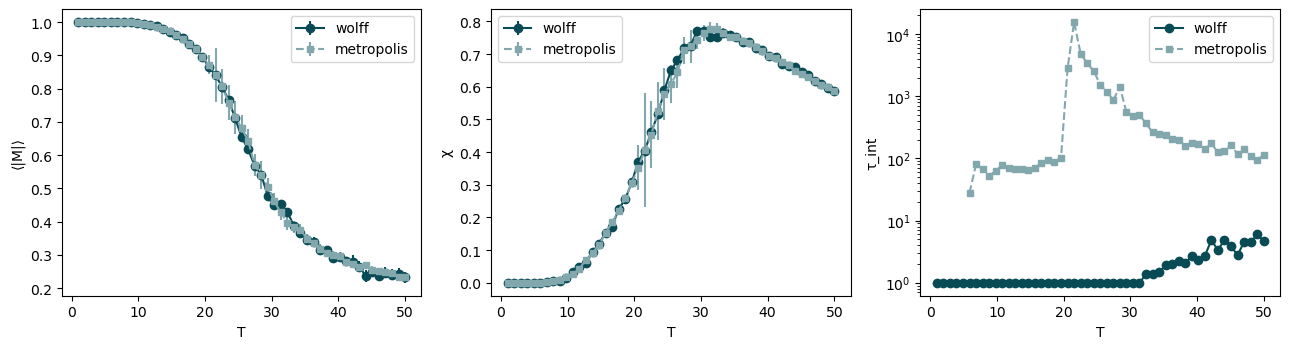

In [16]:
plot_mc_results(temperatures, Mw, Mw_err, Mm, Mm_err,
                Chiw, Chiw_err, Chim, Chim_err,
                Tauw, Taum)


=== δ=0.05, kF=0.05 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3577.37it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 5152.53it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4946.35it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 5101.94it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 5055.15it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 5034.36it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4703.37it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4899.88it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4881.65it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4905.20it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4792.74it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4809.14it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4649.04it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4677.05it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4618.43it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4586.16it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4369.39it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4571.17it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4371.98it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4453.97it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 5074.91it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4915.86it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4774.30it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4601.22it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4774.21it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4637.35it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4596.81it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4509.49it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4439.08it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4145.10it/s]


Order=AFM, Tc≈-0.145

=== δ=0.05, kF=0.1 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4956.31it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 5031.31it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4756.91it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4780.14it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4504.53it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4570.43it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4349.19it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4369.27it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4005.74it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4165.12it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3288.06it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3958.03it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3860.22it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3904.20it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3776.49it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3745.98it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3499.14it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3530.92it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3495.85it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3436.23it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4274.31it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4054.17it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4479.69it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3779.84it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3491.13it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3863.98it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3630.71it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3573.41it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3535.07it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3312.15it/s]


Order=AFM, Tc≈-0.145

=== δ=0.05, kF=0.2 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3897.77it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3881.20it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3376.08it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3401.85it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3142.19it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3196.72it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3040.25it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3105.54it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3169.10it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3177.16it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3314.24it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3388.87it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3555.61it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3721.32it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4116.75it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4308.79it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 5053.01it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4964.84it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 5636.97it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 5615.71it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3771.13it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3306.05it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3040.15it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3025.37it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3005.68it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3200.43it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3596.07it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4096.15it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4100.48it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4463.92it/s]


Order=AFM, Tc≈-0.206

=== δ=0.05, kF=0.3 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3131.80it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3092.06it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3169.00it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3108.41it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3423.60it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3668.93it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 5095.64it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 5223.99it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 6504.90it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 6650.54it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 7910.62it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 8526.74it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 9557.65it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 10202.33it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 11863.77it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 11332.75it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 11882.13it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 12737.20it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 12820.85it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 13200.62it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3018.81it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 2969.10it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3609.28it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4539.28it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 5617.73it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 7989.93it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 9001.81it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 9586.16it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 8972.14it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 11653.50it/s]


Order=AFM, Tc≈-0.201

=== δ=0.1, kF=0.05 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 2105.34it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 2117.12it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 2108.29it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 2182.68it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 2170.33it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 2097.84it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 2067.56it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 2003.41it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:01<00:00, 1939.57it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 1970.12it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 2013.77it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 1995.19it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:01<00:00, 1939.07it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 1963.45it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:01<00:00, 1966.33it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 1915.70it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:01<00:00, 1893.58it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 1913.61it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:01<00:00, 1860.20it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 1880.14it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 2098.12it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 2160.73it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 2059.17it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 2004.19it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 2001.63it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:01<00:00, 1890.50it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:01<00:00, 1883.62it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:01<00:00, 1957.80it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:01<00:00, 1903.86it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:01<00:00, 1859.87it/s]


Order=AFM, Tc≈-0.145

=== δ=0.1, kF=0.1 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 2079.31it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 2140.40it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 2067.07it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 2029.14it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:01<00:00, 1977.80it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 1975.74it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:01<00:00, 1878.61it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 1921.46it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:01<00:00, 1858.37it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 1861.56it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:01<00:00, 1771.09it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 1785.19it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:01<00:00, 1739.89it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 1734.39it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:01<00:00, 1682.74it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 1683.43it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:01<00:00, 1613.92it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:03<00:00, 1600.26it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:01<00:00, 1565.66it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:03<00:00, 1567.72it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 2042.91it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 2006.45it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:01<00:00, 1935.36it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:01<00:00, 1824.39it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:01<00:00, 1818.68it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:01<00:00, 1741.40it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:01<00:00, 1657.56it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:01<00:00, 1620.55it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:01<00:00, 1590.12it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:01<00:00, 1552.05it/s]


Order=AFM, Tc≈-0.145

=== δ=0.1, kF=0.2 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:01<00:00, 1702.58it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 1708.18it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:01<00:00, 1568.69it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:03<00:00, 1500.41it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:01<00:00, 1399.06it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:03<00:00, 1371.78it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:01<00:00, 1245.83it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:03<00:00, 1269.25it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:01<00:00, 1225.75it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:04<00:00, 1232.24it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:01<00:00, 1194.86it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:04<00:00, 1183.12it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:01<00:00, 1155.22it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:04<00:00, 1117.63it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:01<00:00, 1070.45it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:04<00:00, 1109.58it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:01<00:00, 1107.45it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:04<00:00, 1101.84it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:01<00:00, 1098.53it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:04<00:00, 1092.48it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:01<00:00, 1677.93it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:01<00:00, 1519.22it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:01<00:00, 1422.97it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:01<00:00, 1322.53it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:01<00:00, 1251.50it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:01<00:00, 1172.05it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:01<00:00, 1145.72it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:01<00:00, 1114.42it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:01<00:00, 1094.41it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:01<00:00, 1085.89it/s]


Order=AFM, Tc≈-0.072

=== δ=0.1, kF=0.3 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:01<00:00, 1434.40it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:03<00:00, 1415.36it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:01<00:00, 1238.16it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:04<00:00, 1229.26it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:01<00:00, 1126.86it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:04<00:00, 1143.03it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:01<00:00, 1105.71it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:04<00:00, 1091.16it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:01<00:00, 1085.40it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:04<00:00, 1080.62it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:01<00:00, 1124.45it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:04<00:00, 1159.32it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:01<00:00, 1259.58it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:03<00:00, 1258.67it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:01<00:00, 1436.51it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:03<00:00, 1408.52it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:01<00:00, 1753.22it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 1697.65it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 2061.28it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 2012.26it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:01<00:00, 1335.29it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:01<00:00, 1172.73it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:01<00:00, 1078.01it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:01<00:00, 1073.37it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:01<00:00, 1077.58it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:01<00:00, 1134.90it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:01<00:00, 1209.51it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:01<00:00, 1371.81it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:01<00:00, 1598.99it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 2049.49it/s]


Order=AFM, Tc≈-0.214

=== δ=0.2, kF=0.05 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:03<00:00, 652.57it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:07<00:00, 641.70it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:03<00:00, 643.95it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:07<00:00, 634.78it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:03<00:00, 629.24it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:07<00:00, 626.24it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:03<00:00, 629.94it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:08<00:00, 621.41it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:03<00:00, 623.14it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:08<00:00, 611.31it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:03<00:00, 614.09it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:08<00:00, 605.50it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:03<00:00, 616.63it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:08<00:00, 598.41it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:03<00:00, 589.87it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:08<00:00, 598.45it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:03<00:00, 596.61it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:08<00:00, 590.72it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:03<00:00, 591.70it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:08<00:00, 581.84it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:03<00:00, 634.25it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:03<00:00, 632.50it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:03<00:00, 616.47it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:03<00:00, 617.20it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:03<00:00, 615.68it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:03<00:00, 610.37it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:03<00:00, 602.89it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:03<00:00, 594.17it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:03<00:00, 590.16it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:03<00:00, 582.74it/s]


Order=AFM, Tc≈-0.145

=== δ=0.2, kF=0.1 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:03<00:00, 633.15it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:08<00:00, 622.56it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:03<00:00, 623.28it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:08<00:00, 607.28it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:03<00:00, 597.95it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:08<00:00, 593.17it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:03<00:00, 588.74it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:08<00:00, 582.29it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:03<00:00, 570.20it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:08<00:00, 569.34it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:03<00:00, 563.97it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:08<00:00, 556.84it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:03<00:00, 551.74it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:09<00:00, 544.54it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:03<00:00, 540.16it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:09<00:00, 534.32it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:03<00:00, 506.54it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:09<00:00, 523.41it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:03<00:00, 518.28it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:09<00:00, 513.69it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:03<00:00, 614.86it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:03<00:00, 585.91it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:03<00:00, 588.52it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:03<00:00, 578.38it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:03<00:00, 565.90it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:03<00:00, 555.06it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:03<00:00, 539.31it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:03<00:00, 531.88it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:03<00:00, 508.23it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:03<00:00, 503.92it/s]


Order=AFM, Tc≈-0.145

=== δ=0.2, kF=0.2 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:03<00:00, 544.51it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:09<00:00, 526.45it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:04<00:00, 497.94it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:09<00:00, 505.33it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:04<00:00, 478.63it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:10<00:00, 474.17it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:04<00:00, 450.44it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:11<00:00, 450.36it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:04<00:00, 431.59it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:11<00:00, 425.60it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:04<00:00, 408.23it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:12<00:00, 409.30it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:05<00:00, 390.04it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:12<00:00, 387.59it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:05<00:00, 374.70it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:13<00:00, 370.99it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:05<00:00, 359.59it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:14<00:00, 353.08it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:05<00:00, 345.63it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:14<00:00, 341.98it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:03<00:00, 532.30it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:04<00:00, 498.49it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:04<00:00, 468.71it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:04<00:00, 441.44it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:04<00:00, 422.46it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:04<00:00, 402.62it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:05<00:00, 386.69it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:05<00:00, 370.36it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:05<00:00, 353.91it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:05<00:00, 339.32it/s]


Order=AFM, Tc≈-0.145

=== δ=0.2, kF=0.3 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:04<00:00, 471.37it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:10<00:00, 465.71it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:04<00:00, 416.96it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:11<00:00, 416.88it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:05<00:00, 385.04it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:13<00:00, 381.46it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:05<00:00, 355.47it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:14<00:00, 349.60it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:06<00:00, 328.04it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:15<00:00, 325.32it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:06<00:00, 307.89it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:16<00:00, 306.07it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:06<00:00, 294.75it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:17<00:00, 287.89it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:07<00:00, 280.30it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:17<00:00, 278.92it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:07<00:00, 266.45it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:18<00:00, 267.00it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:07<00:00, 265.88it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:18<00:00, 270.10it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:04<00:00, 454.29it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:04<00:00, 419.01it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:05<00:00, 377.53it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:05<00:00, 344.04it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:06<00:00, 316.54it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:06<00:00, 291.08it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:07<00:00, 284.74it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:07<00:00, 270.44it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:07<00:00, 269.21it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:07<00:00, 267.19it/s]


Order=AFM, Tc≈-0.193

=== δ=0.3, kF=0.05 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:06<00:00, 304.92it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:16<00:00, 300.56it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:06<00:00, 302.24it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:17<00:00, 292.58it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:06<00:00, 292.22it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:16<00:00, 300.03it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:06<00:00, 297.96it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:16<00:00, 296.20it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:06<00:00, 289.79it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:17<00:00, 290.55it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:06<00:00, 288.00it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:17<00:00, 289.35it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:06<00:00, 291.94it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:17<00:00, 287.99it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:06<00:00, 290.19it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:17<00:00, 286.92it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:07<00:00, 283.43it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:17<00:00, 282.34it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:07<00:00, 284.59it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:17<00:00, 282.61it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:06<00:00, 301.88it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:06<00:00, 298.37it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:06<00:00, 290.18it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:06<00:00, 290.86it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:06<00:00, 295.46it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:06<00:00, 290.89it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:06<00:00, 289.63it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:07<00:00, 284.09it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:07<00:00, 280.45it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:07<00:00, 276.26it/s]


Order=AFM, Tc≈-0.145

=== δ=0.3, kF=0.1 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:06<00:00, 297.40it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:17<00:00, 290.21it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:06<00:00, 285.96it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:17<00:00, 280.87it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:06<00:00, 286.17it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:17<00:00, 284.47it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:07<00:00, 274.94it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:18<00:00, 274.96it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:07<00:00, 268.32it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:18<00:00, 272.20it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:07<00:00, 274.88it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:18<00:00, 272.10it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:07<00:00, 265.52it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:19<00:00, 261.96it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:07<00:00, 267.13it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:19<00:00, 261.21it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:07<00:00, 258.75it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:19<00:00, 250.35it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:08<00:00, 248.72it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:20<00:00, 248.04it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:06<00:00, 291.75it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:06<00:00, 288.40it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:07<00:00, 285.36it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:07<00:00, 277.65it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:07<00:00, 275.99it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:07<00:00, 268.84it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:07<00:00, 255.78it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:07<00:00, 259.41it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:07<00:00, 257.10it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:07<00:00, 252.66it/s]


Order=AFM, Tc≈-0.145

=== δ=0.3, kF=0.2 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:07<00:00, 270.10it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:18<00:00, 266.13it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:07<00:00, 255.55it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:19<00:00, 252.48it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:08<00:00, 238.48it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:21<00:00, 227.77it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:08<00:00, 227.36it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:22<00:00, 225.89it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:09<00:00, 218.43it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:22<00:00, 218.14it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:09<00:00, 212.81it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:24<00:00, 204.50it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:09<00:00, 201.99it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:25<00:00, 199.27it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:10<00:00, 191.39it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:25<00:00, 195.54it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:10<00:00, 192.69it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:26<00:00, 188.04it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:11<00:00, 179.59it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:27<00:00, 180.49it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:07<00:00, 255.00it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:08<00:00, 247.67it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:08<00:00, 236.00it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:08<00:00, 227.64it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:09<00:00, 218.70it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:09<00:00, 209.59it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:09<00:00, 201.45it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:10<00:00, 190.83it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:10<00:00, 185.59it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:10<00:00, 182.79it/s]


Order=AFM, Tc≈-0.145

=== δ=0.3, kF=0.3 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:08<00:00, 238.72it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:21<00:00, 234.73it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:09<00:00, 217.86it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:23<00:00, 213.93it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:09<00:00, 201.52it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:24<00:00, 200.35it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:10<00:00, 183.82it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:26<00:00, 187.20it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:11<00:00, 177.01it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:28<00:00, 174.73it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:12<00:00, 166.29it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:30<00:00, 165.72it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:12<00:00, 157.70it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:32<00:00, 155.44it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:13<00:00, 149.26it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:33<00:00, 147.59it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:13<00:00, 144.40it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:35<00:00, 142.67it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:14<00:00, 137.35it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:36<00:00, 137.75it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:08<00:00, 235.12it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:09<00:00, 214.35it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:10<00:00, 199.65it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:10<00:00, 186.46it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:11<00:00, 174.61it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:12<00:00, 164.69it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:12<00:00, 157.36it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:13<00:00, 148.96it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:13<00:00, 143.15it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:14<00:00, 137.85it/s]


Order=AFM, Tc≈2.125


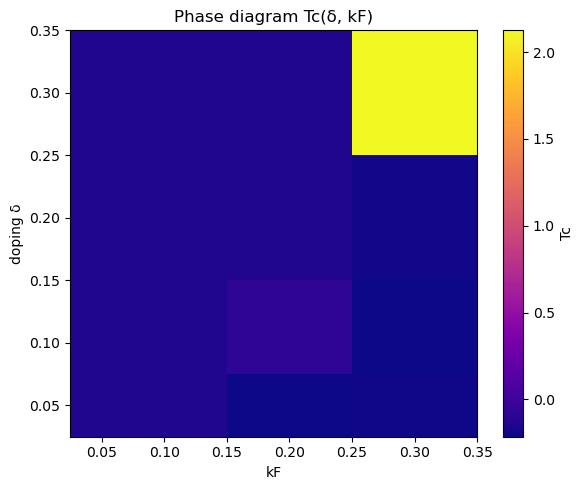

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from lattice import Lattice
from monte_carlo import MonteCarlo


dopings = [0.05, 0.1, 0.2, 0.3]
kF_values = [0.05, 0.1, 0.2, 0.3]

rows, cols = 10, 10   # размер решётки
J0 = 1.0

T_grid = np.linspace(0.5, 3.0, 10)

Tc_map = np.zeros((len(dopings), len(kF_values)))

for i, δ in enumerate(dopings):
    for j, kf in enumerate(kF_values):
        print(f"\n=== δ={δ}, kF={kf} ===")
        lat = Lattice(rows, cols, doping=δ, kf=kf, J0=J0)
        mc = MonteCarlo(lat)

        res = sweep_and_Tc(mc, T_grid,
                           steps_warm=2000,
                           steps_prod=5000,
                           method="wolff",
                           qn=64)
        Tc_map[i, j] = res["Tc_est"]
        print(f"Order={res['order']}, Tc≈{res['Tc_est']:.3f}")

# ----------- построение фазовой диаграммы -----------
X, Y = np.meshgrid(kF_values, dopings)

plt.figure(figsize=(6,5))
c = plt.pcolormesh(X, Y, Tc_map, shading="auto", cmap="plasma")
plt.colorbar(c, label="Tc")
plt.xlabel("kF")
plt.ylabel("doping δ")
plt.title("Phase diagram Tc(δ, kF)")
plt.tight_layout()
plt.show()


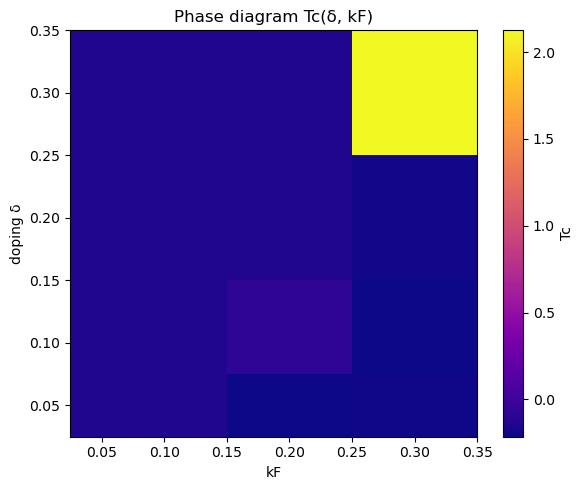

In [19]:

plt.figure(figsize=(6,5))
c = plt.pcolormesh(X, Y, Tc_map, shading="auto", cmap="plasma")
plt.colorbar(c, label="Tc")
plt.xlabel("kF")
plt.ylabel("doping δ")
plt.title("Phase diagram Tc(δ, kF)")
plt.tight_layout()
plt.show()


=== δ=0.05, kF=0.05 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 48235.62it/s]


Starting production phase...


  0%|          | 0/5000 [00:00<?, ?it/s]

100%|██████████| 5000/5000 [00:00<00:00, 39926.89it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 55480.95it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 41569.91it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 48864.73it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 41540.51it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 39690.97it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 35378.91it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 50030.17it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 40922.83it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 41929.41it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 42530.56it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 55381.68it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 43200.97it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 42503.66it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 38963.36it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 46755.59it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 37279.79it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 36008.64it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 30896.45it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 33618.17it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 33465.01it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 32518.77it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 31614.09it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 30826.53it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 37375.89it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 40993.43it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 29878.22it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 38622.12it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 31417.30it/s]


Order=AFM, Tc≈1.188

=== δ=0.05, kF=0.1 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 47647.11it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 33932.96it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 49115.36it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 41265.54it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 55132.72it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 41899.46it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 49779.00it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 43334.60it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 53482.06it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 42588.51it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 50529.83it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 43472.49it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 56246.16it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 39268.24it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 49004.32it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 44556.64it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 44154.75it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 38553.28it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 48757.37it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 36176.88it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 35324.47it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 27883.02it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 33319.20it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 31542.88it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 39987.64it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 36499.03it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 38367.92it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 41193.32it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 41647.14it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 40975.61it/s]


Order=AFM, Tc≈1.184

=== δ=0.05, kF=0.2 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 33349.40it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 36362.43it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 45445.03it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 42154.74it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 55888.66it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 43278.80it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 55528.69it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 42784.26it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 53333.47it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 42891.89it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 48589.33it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 40193.65it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 52404.56it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 37987.20it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 52652.90it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 32111.86it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 50101.58it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 39353.72it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 47929.15it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 40714.84it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 36761.18it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 44842.80it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 40085.10it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 37997.05it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 42928.68it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 39152.08it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 39224.40it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 44025.44it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 41552.24it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 45635.15it/s]


Order=AFM, Tc≈1.188

=== δ=0.05, kF=0.3 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 46777.23it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 40579.49it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 54308.20it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 44918.82it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 50407.16it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 37577.17it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 53790.02it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 43015.77it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 50349.98it/s]

Starting production phase...



100%|██████████| 5000/5000 [00:00<00:00, 41523.65it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 48733.58it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 44211.07it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 45781.35it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 40771.59it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 52500.33it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 41003.09it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 48783.17it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 36245.66it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 50230.88it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 44468.68it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 38055.31it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 37618.93it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 39104.99it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 43945.87it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 43098.29it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 43602.10it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 40057.34it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 38178.63it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 40726.74it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 38611.98it/s]


Order=AFM, Tc≈1.202

=== δ=0.1, kF=0.05 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 26138.03it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 23518.95it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 25147.22it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 22898.27it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 29231.04it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 25648.40it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 35093.64it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 28762.55it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 29863.22it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 27978.14it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 38185.58it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 32755.77it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 38617.85it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 33425.22it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 40756.61it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 34848.05it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 41373.13it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 35065.74it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 42231.27it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 35374.43it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 22513.17it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 22593.63it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 25324.10it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 27368.85it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 30229.76it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 22725.04it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 28531.32it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 28424.30it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 30685.24it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 34931.14it/s]


Order=AFM, Tc≈1.210

=== δ=0.1, kF=0.1 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 27329.17it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 23620.86it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 25216.46it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 24187.93it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 33933.95it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 28223.19it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 34518.32it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 29619.58it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 39026.40it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 28626.90it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 33502.03it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 34263.44it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 36654.85it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 33074.04it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 35570.42it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 28828.65it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 27980.59it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 27286.06it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 36165.12it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 35119.53it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 17369.91it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 16765.88it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 21103.04it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 23201.21it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 24099.72it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 24234.31it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 24511.97it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 24896.15it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 25842.59it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 26556.40it/s]


Order=AFM, Tc≈1.196

=== δ=0.1, kF=0.2 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 19336.25it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 22329.37it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 29468.87it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 27017.53it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 32851.28it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 31933.44it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 42450.32it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 34964.77it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 41186.04it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 36238.96it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 44762.88it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 33348.52it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 45460.30it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 35435.88it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 45564.26it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 36147.70it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 42487.30it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 33554.86it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 42874.93it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 37602.37it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 22824.16it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 29749.58it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 32547.16it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 33050.48it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 33780.22it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 29757.28it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 29171.48it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 33028.62it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 34199.15it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 26179.30it/s]


Order=AFM, Tc≈1.162

=== δ=0.1, kF=0.3 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 22541.66it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 22934.23it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 44329.75it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 32969.53it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 36325.64it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 36544.92it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 38791.43it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 34542.97it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 46124.96it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 35922.32it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 38301.35it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 35097.19it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 39680.65it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 36313.13it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 40287.43it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 34296.61it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 39378.14it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 34186.69it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 45167.79it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 35212.34it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 21277.54it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 35307.37it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 36675.36it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 37319.36it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 37247.94it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 35679.96it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 33476.63it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 27629.46it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 35934.60it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 38278.45it/s]


Order=AFM, Tc≈1.153

=== δ=0.2, kF=0.05 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 9624.50it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 10001.66it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 9216.88it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 9142.89it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 8347.88it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 8176.56it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 7140.38it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7434.85it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 7198.04it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7052.95it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 7136.93it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 6980.38it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 7235.46it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7236.99it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 8220.93it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 8439.65it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 10371.56it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 9886.42it/s] 


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 12973.45it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 11760.69it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 8605.17it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 8544.05it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 8015.26it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 7107.42it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 6801.89it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 6687.61it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 7109.57it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 8120.43it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 9104.73it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 11085.00it/s]


Order=AFM, Tc≈1.214

=== δ=0.2, kF=0.1 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 10149.53it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 9991.36it/s] 


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 8867.10it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 8502.00it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 7356.30it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7490.68it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 7094.27it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 6414.18it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 7159.46it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7004.63it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 8727.41it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 8119.25it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 11626.59it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 11154.01it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 14675.69it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 13383.82it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 14965.81it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 15845.42it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 18548.69it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 16914.88it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 9502.68it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 8062.71it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 6563.38it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 6680.31it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 6853.38it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 8476.81it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 9495.21it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 12538.14it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 15417.26it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 16395.30it/s]


Order=AFM, Tc≈1.214

=== δ=0.2, kF=0.2 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 9696.25it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 9542.70it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 6689.13it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7307.88it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 5852.42it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7012.94it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 11079.63it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 10353.99it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 15726.59it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 15121.71it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 18113.99it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 17814.11it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 14897.11it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 16581.89it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 23707.95it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 20996.40it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 24535.34it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 22016.21it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 25647.82it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 21944.59it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 9306.24it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 7149.33it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 6850.27it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 9749.24it/s] 


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 14291.47it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 15227.13it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 18804.36it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 20967.69it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 22287.96it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 23179.42it/s]


Order=AFM, Tc≈1.213

=== δ=0.2, kF=0.3 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 9191.97it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 8989.93it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 7308.58it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7326.00it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 14852.88it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 14185.33it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 20476.65it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 19049.59it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 20172.20it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 21202.35it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 27126.00it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 22360.87it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 25234.13it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 22618.05it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 28233.82it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 24053.30it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 26565.65it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 23351.48it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 29442.29it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 24204.63it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 8169.45it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 6819.60it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 12979.63it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 19048.39it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 17357.05it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 20259.70it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 21835.04it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 24094.53it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 16781.24it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 17501.75it/s]


Order=AFM, Tc≈1.192

=== δ=0.3, kF=0.05 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 5137.59it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 5917.13it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 5363.73it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 5484.43it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4995.79it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4980.84it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4614.16it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4609.19it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4265.11it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4247.88it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3858.66it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3985.85it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3731.48it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3724.80it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3619.60it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3648.47it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3555.07it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3530.29it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3395.56it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3631.56it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 5525.91it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 5204.34it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4747.01it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4355.81it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4178.09it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3893.72it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3733.14it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3521.63it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3389.39it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3525.21it/s]


Order=AFM, Tc≈1.214

=== δ=0.3, kF=0.1 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 5456.14it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 5881.61it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 5184.49it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 5022.30it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4154.33it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4604.96it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4135.00it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4164.24it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3820.20it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3825.67it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3520.16it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3640.87it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3602.06it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3649.51it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3952.32it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3979.33it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4857.75it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4886.90it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 6278.75it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 6389.23it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 5761.01it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 5065.30it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4504.47it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4059.30it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3693.76it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3484.10it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3601.16it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3903.45it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4771.86it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 6155.91it/s]


Order=AFM, Tc≈1.214

=== δ=0.3, kF=0.2 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 5521.01it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 5802.44it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4373.79it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4459.52it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3678.29it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3763.74it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3499.94it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3472.23it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4228.89it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4404.07it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 6790.69it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 6959.92it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 9172.80it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 9602.80it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 10366.24it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 11891.26it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 13371.82it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 13244.91it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 15403.56it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 14364.55it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 5426.24it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4393.97it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3570.21it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3404.21it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4263.09it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 6364.11it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 9064.27it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 11706.30it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 13142.83it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 13534.01it/s]


Order=AFM, Tc≈1.214

=== δ=0.3, kF=0.3 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 5509.60it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 5268.43it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3586.42it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3584.26it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4334.77it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4415.04it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 9826.52it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 9389.12it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 13999.33it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 12951.53it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 14147.46it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 15233.62it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 18466.70it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 16885.27it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 18626.86it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 17235.32it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 20877.88it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 18471.32it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 20245.42it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 17779.80it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 5078.27it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3502.09it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4498.81it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 8942.25it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 13088.16it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 15210.42it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 16248.33it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 15280.38it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 18188.18it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 18352.48it/s]


Order=AFM, Tc≈1.210


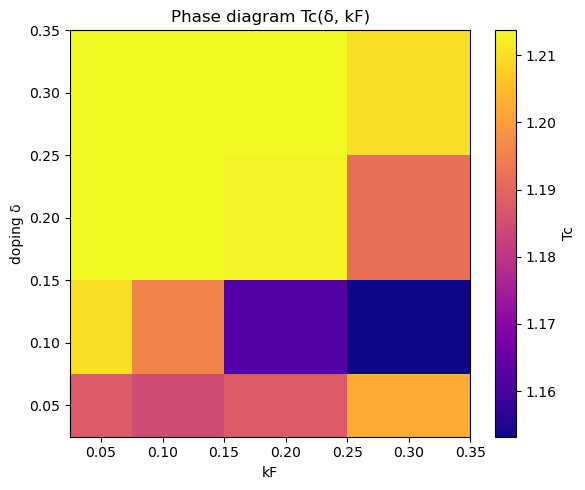

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from lattice import Lattice
from monte_carlo import MonteCarlo


dopings = [0.05, 0.1, 0.2, 0.3]
kF_values = [0.05, 0.1, 0.2, 0.3]

rows, cols = 10, 10   # размер решётки
J0 = -1.0

T_grid = np.linspace(0.5, 30.0, 10)

Tc_map = np.zeros((len(dopings), len(kF_values)))

for i, δ in enumerate(dopings):
    for j, kf in enumerate(kF_values):
        print(f"\n=== δ={δ}, kF={kf} ===")
        lat = Lattice(rows, cols, doping=δ, kf=kf, J0=J0)
        mc = MonteCarlo(lat)

        res = sweep_and_Tc(mc, T_grid,
                           steps_warm=2000,
                           steps_prod=5000,
                           method="wolff",
                           qn=64)
        Tc_map[i, j] = res["Tc_est"]
        print(f"Order={res['order']}, Tc≈{res['Tc_est']:.3f}")

# ----------- построение фазовой диаграммы -----------
X, Y = np.meshgrid(kF_values, dopings)

plt.figure(figsize=(6,5))
c = plt.pcolormesh(X, Y, Tc_map, shading="auto", cmap="plasma")
plt.colorbar(c, label="Tc")
plt.xlabel("kF")
plt.ylabel("doping δ")
plt.title("Phase diagram Tc(δ, kF)")
plt.tight_layout()
plt.show()


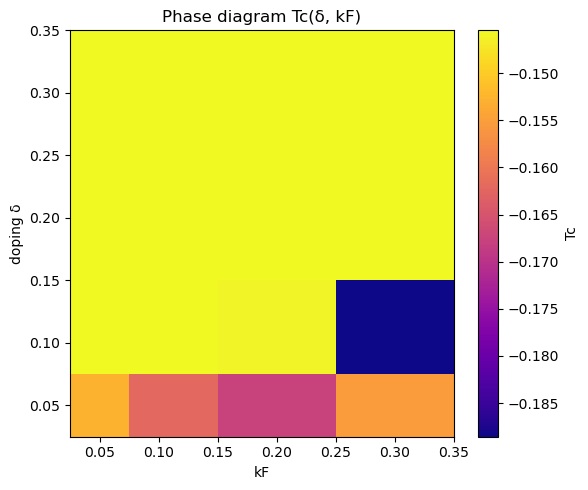

In [21]:

plt.figure(figsize=(6,5))
c = plt.pcolormesh(X, Y, Tc_map, shading="auto", cmap="plasma")
plt.colorbar(c, label="Tc")
plt.xlabel("kF")
plt.ylabel("doping δ")
plt.title("Phase diagram Tc(δ, kF)")
plt.tight_layout()
plt.show()

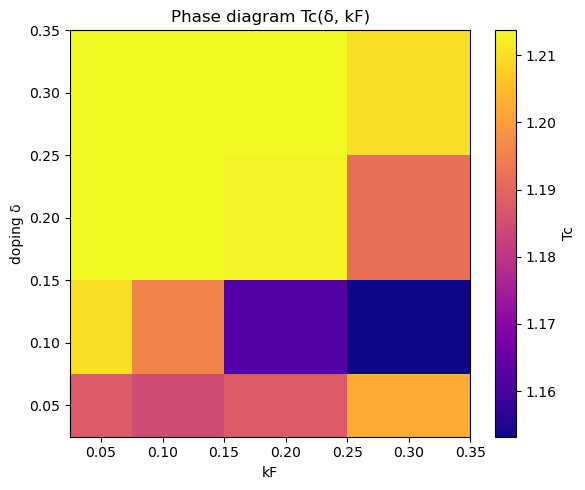

In [23]:

plt.figure(figsize=(6,5))
c = plt.pcolormesh(X, Y, Tc_map, shading="auto", cmap="plasma")
plt.colorbar(c, label="Tc")
plt.xlabel("kF")
plt.ylabel("doping δ")
plt.title("Phase diagram Tc(δ, kF)")
plt.tight_layout()
plt.show()


=== δ=0.05, kF=0.05 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 30579.98it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 25115.80it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 35246.55it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 30066.48it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 36853.56it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 32928.16it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 49936.05it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 34900.59it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 44479.95it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 38900.55it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 41376.59it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 34861.89it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 44821.00it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 38703.41it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 45367.61it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 36494.55it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 50730.90it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 38928.21it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 43734.63it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 39588.25it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 45758.87it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 38461.15it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 41055.62it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 40128.66it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 50106.97it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 39889.07it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 50490.59it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 39983.22it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 51870.22it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 39964.10it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 44484.20it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 37475.38it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 46967.37it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 38024.67it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 47058.80it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 35338.37it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 51987.88it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 41427.84it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 42072.83it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 38290.44it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 50292.62it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 33945.48it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 50790.18it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 39770.46it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 48556.99it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 37971.32it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 48171.36it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 40627.60it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 48371.07it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 40629.65it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 46158.46it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 40818.09it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 45578.87it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 38915.20it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 39706.00it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 32935.87it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 46744.65it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 40497.60it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 46364.34it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 38621.94it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 50621.91it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 40336.67it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 50397.47it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 41152.74it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 51168.46it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 40755.03it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 50723.54it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 30113.71it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 52255.05it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 41073.27it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 51293.61it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 40896.98it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 52508.55it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 40521.62it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 51200.31it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 38640.30it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 49703.50it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 38845.57it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 53055.18it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 40693.35it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 26389.31it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 36413.47it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 32152.70it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 40730.89it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 34588.63it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 33904.46it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 30006.36it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 37612.35it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 34922.85it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 37602.57it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 37483.61it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 35497.12it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 26730.21it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 36421.54it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 28051.70it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 40145.52it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 36376.05it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 40787.33it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 39142.40it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 41021.69it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 40805.19it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 37719.92it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 39444.62it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 35970.34it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 35421.27it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 38240.94it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 35876.35it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 33486.92it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 32435.28it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 35792.46it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 38709.98it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 32279.15it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 36361.39it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 37109.36it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 34593.34it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 36959.59it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 34713.01it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 37106.73it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 36344.84it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 38058.76it/s]


Order=AFM, Tc≈0.415

=== δ=0.05, kF=0.1 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 31275.57it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 34763.65it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 48991.44it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 39347.15it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 45577.38it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 33853.75it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 39480.08it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 40754.32it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 50138.41it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 37318.59it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 50384.75it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 39613.30it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 43966.37it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 34945.31it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 42011.10it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 35016.44it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 43762.24it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 38071.27it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 45775.35it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 39568.38it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 49207.26it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 38311.49it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 46638.36it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 38734.43it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 51445.55it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 38557.39it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 42658.86it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 37776.45it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 50902.67it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 31250.59it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 53287.05it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 40372.08it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 45202.11it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 41355.62it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 50492.11it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 39979.94it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 38014.44it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 40376.90it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 38295.23it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 39562.11it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 54128.43it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 40804.59it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 44443.66it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 36415.65it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 52549.01it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 37208.62it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 43979.28it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 37738.52it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 49797.03it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 39986.20it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 50918.74it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 41344.70it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 46970.53it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 34967.92it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 39317.42it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 40069.93it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 52639.03it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 39406.00it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 50510.66it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 38580.73it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 51406.45it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 41056.06it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 48697.65it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 36188.55it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 50645.75it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 37081.44it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 51945.70it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 40043.76it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 39275.08it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 31049.64it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 47248.05it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 37670.66it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 41615.53it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 41200.77it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 47321.61it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 40381.88it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 47701.85it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 38980.96it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 47675.28it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 36379.33it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 26887.43it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 38173.42it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 34855.66it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 30834.69it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 34251.52it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 38369.32it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 36359.34it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 33363.86it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 39609.45it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 33024.85it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 38709.80it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 40489.08it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 39585.15it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 40240.27it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 36224.00it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 35743.51it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 33164.42it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 37595.67it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 35704.56it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 38554.84it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 39523.60it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 39047.11it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 30932.47it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 38483.03it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 36884.19it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 36560.43it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 32571.68it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 37724.67it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 37711.61it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 31449.10it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 35119.64it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 36193.83it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 30783.66it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 31102.44it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 37312.55it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 37432.77it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 36797.79it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 37336.30it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 32610.17it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 32225.33it/s]


Order=AFM, Tc≈0.408

=== δ=0.05, kF=0.2 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 47194.36it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 32455.36it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 44622.39it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 32463.70it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 51210.00it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 36725.45it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 34734.29it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 30608.21it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 45801.35it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 37534.00it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 48018.32it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 41003.73it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 51724.70it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 40176.79it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 47020.55it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 38120.40it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 47437.22it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 35932.78it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 51845.22it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 38845.79it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 38889.08it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 38866.67it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 44469.34it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 37888.17it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 52387.54it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 35893.54it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 51186.25it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 39306.74it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 48492.99it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 37964.03it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 43526.54it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 39880.05it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 50851.45it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 39965.16it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 47176.31it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 39117.14it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 48857.90it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 39731.96it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 43569.72it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 32921.44it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 36792.46it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 36433.05it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 40303.69it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 37771.35it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 54026.99it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 39550.25it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 46171.16it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 37516.07it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 46232.75it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 36461.87it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 44220.62it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 39981.70it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 43406.49it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 40243.71it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 53194.13it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 37111.23it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 52143.64it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 37517.01it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 39812.48it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 36747.01it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 49110.47it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 38567.75it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 48162.78it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 38356.90it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 49926.54it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 37514.06it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 44790.84it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 38857.74it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 45570.20it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 39860.26it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 38837.77it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 40661.79it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 50311.32it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 39906.30it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 47786.63it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 40572.19it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 46009.60it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 40840.35it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 43588.96it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 33628.31it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 34840.32it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 39383.69it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 36429.29it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 38296.63it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 37428.42it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 37947.20it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 39148.61it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 37051.01it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 37740.11it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 34667.25it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 33350.59it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 36295.78it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 35223.90it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 34179.37it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 32875.36it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 36011.11it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 32954.66it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 29539.54it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 28310.43it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 32290.08it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 30097.44it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 40158.59it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 32500.51it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 33365.32it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 37333.14it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 34760.34it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 35614.82it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 33765.81it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 29622.88it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 33563.83it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 29076.53it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 33127.09it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 33631.65it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 37988.10it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 31099.10it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 33333.89it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 35293.56it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 32376.57it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 33656.34it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 34385.60it/s]


Order=AFM, Tc≈0.409

=== δ=0.05, kF=0.3 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 38367.57it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 36687.74it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 45810.60it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 39417.11it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 52154.01it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 41860.99it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 41439.55it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 32048.80it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 45829.12it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 36519.84it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 41837.19it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 35845.75it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 45035.40it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 38548.32it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 38206.10it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 39060.53it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 42528.66it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 39238.71it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 52813.01it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 36967.77it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 48148.68it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 38651.98it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 45146.16it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 37415.54it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 43548.45it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 33831.09it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 41383.33it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 39251.41it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 45338.68it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 38823.35it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 49836.97it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 39324.80it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 31443.33it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 30249.76it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 47040.07it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 37739.33it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 46201.93it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 40086.63it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 51930.59it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 41051.00it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 49214.48it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 41335.57it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 46945.30it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 39723.23it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 47460.57it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 39676.18it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 51351.70it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 40523.66it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 49463.76it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 35905.96it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 43376.86it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 36724.68it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 46007.33it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 41201.41it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 41373.13it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 37100.40it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 49841.11it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 37240.99it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 37317.20it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 40354.14it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 54070.17it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 40745.45it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 48728.20it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 39744.76it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 48399.54it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 34744.53it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 52877.93it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 34431.98it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 52688.29it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 41600.50it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 51149.43it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 41148.38it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 46308.80it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 32180.60it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 47877.18it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 34740.21it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 54882.74it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 40992.75it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 47300.27it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 34901.64it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 30475.33it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 34053.52it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 31272.65it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 34559.14it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 39824.38it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 29793.43it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 35069.14it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 31768.53it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 34359.12it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 30799.14it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 32968.26it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 36091.52it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 35064.15it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 31840.52it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 30467.58it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 35688.91it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 35097.60it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 32928.66it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 26342.90it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 34481.01it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 37164.77it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 40155.90it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 37027.95it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 32792.98it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 30937.72it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 41108.74it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 33997.63it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 31807.80it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 40087.59it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 40227.54it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 30336.46it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 34463.86it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 34313.02it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 35766.98it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 40294.39it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 30063.89it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 28960.69it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 32355.09it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 38892.87it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 40215.39it/s]


Order=AFM, Tc≈0.423

=== δ=0.1, kF=0.05 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 26866.67it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 23407.49it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 24518.63it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 22295.61it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 20424.85it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 22489.90it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 20923.55it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 21803.32it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 25282.66it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 23933.62it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 30742.93it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 25678.24it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 33097.55it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 26294.07it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 32978.75it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 27021.57it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 30938.52it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 26788.65it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 30607.20it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 27738.01it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 29763.09it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 27148.23it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 27528.00it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 25943.36it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 36960.24it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 30385.14it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 29782.22it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 30911.80it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 34069.01it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 28206.10it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 33720.06it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 28150.79it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 38001.69it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 30652.01it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 36081.59it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 29901.90it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 38580.55it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 29679.52it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 37477.42it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 30512.95it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 38869.08it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 29631.84it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 41982.29it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 32076.16it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 33456.74it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 31116.45it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 39962.88it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 32471.80it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 36768.60it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 31881.59it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 39035.66it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 33610.63it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 40076.67it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 29821.11it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 43333.62it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 27721.51it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 38066.71it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 31802.45it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 42120.58it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 32311.25it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 29619.12it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 32450.79it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 31884.45it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 31762.08it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 41931.93it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 29456.29it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 43522.47it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 30332.27it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 36520.80it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 33087.97it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 35240.77it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 31962.54it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 39616.56it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 32256.33it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 34057.39it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 32852.39it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 40658.63it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 33859.93it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 42738.40it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 30692.02it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 21351.52it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 20508.09it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 18265.65it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 18713.88it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 19571.29it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 20311.35it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 21226.56it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 24425.53it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 24976.95it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 24531.68it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 25186.78it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 25783.02it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 29638.69it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 31223.65it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 23761.14it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 30110.62it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 27157.97it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 31574.58it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 28333.77it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 32051.23it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 26744.53it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 23300.59it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 28836.64it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 29072.00it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 25289.59it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 29851.74it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 27712.25it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 28849.04it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 29931.31it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 27177.94it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 27025.24it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 24615.98it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 30440.49it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 26431.80it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 29395.65it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 25309.58it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 30795.07it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 24453.09it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 28947.30it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 22760.62it/s]


Order=AFM, Tc≈0.436

=== δ=0.1, kF=0.1 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 27236.62it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 23203.38it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 25566.06it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 21781.62it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 23333.71it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 22096.94it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 30095.28it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 25222.55it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 29708.81it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 26663.17it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 26424.81it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 27247.38it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 31736.92it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 28210.09it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 33812.90it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 29946.05it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 34966.37it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 29867.92it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 34384.05it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 30613.66it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 40839.95it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 28323.32it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 40639.33it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 29616.11it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 37513.45it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 31098.40it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 34061.40it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 32754.44it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 36277.41it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 30096.55it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 40207.87it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 31707.48it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 37563.85it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 32483.52it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 31413.54it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 31380.63it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 34887.41it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 28493.14it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 41684.60it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 32762.68it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 35399.75it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 32358.51it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 34328.89it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 31881.20it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 31409.30it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 31705.85it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 35751.12it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 33052.87it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 31929.23it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 30375.50it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 31550.47it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 32891.19it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 33236.82it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 25482.88it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 26532.12it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 21452.02it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 29000.64it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 20608.44it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 28533.84it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 23232.97it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 29204.08it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 21249.87it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 28126.28it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 23248.14it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 27843.23it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 20962.97it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 20955.28it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 24667.09it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 27964.08it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 22708.35it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 26704.94it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 25238.64it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 27608.09it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 25805.67it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 32464.78it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 27883.40it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 39373.52it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 31501.59it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 42612.92it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 30914.48it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 20914.37it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 18815.29it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 21266.81it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 19071.61it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 25377.34it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 25928.94it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 25469.57it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 27054.35it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 28784.30it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 23661.27it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 31328.60it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 29885.77it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 30438.17it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 32081.26it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 30382.06it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 29985.98it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 32344.12it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 27130.92it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 28327.45it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 29386.18it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 33950.84it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 33921.46it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 28956.69it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 33029.92it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 25440.76it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 23382.94it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 34417.06it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 23966.56it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 25870.88it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 31102.67it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 31909.56it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 28262.17it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 26062.75it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 27326.86it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 27642.66it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 34462.02it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 32045.60it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 34706.41it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 25229.28it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 27339.06it/s]


Order=AFM, Tc≈0.435

=== δ=0.1, kF=0.2 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 25102.97it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 22801.92it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 25987.82it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 23382.88it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 33775.73it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 25189.71it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 34232.93it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 28608.97it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 27971.63it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 28364.85it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 39236.51it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 30561.86it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 35020.97it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 30356.99it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 37485.96it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 31223.93it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 35943.37it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 31331.73it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 31952.83it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 33038.09it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 33655.53it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 28116.37it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 37379.22it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 33790.59it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 38970.02it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 30641.93it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 33720.06it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 29154.48it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 36194.14it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 30654.60it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 43230.67it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 30289.95it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 42651.70it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 34084.02it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 43518.18it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 31547.46it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 44139.19it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 30328.54it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 35065.18it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 31604.46it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 38569.91it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 30884.12it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 31216.68it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 31398.58it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 43689.53it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 31739.49it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 40197.85it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 33527.93it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 38715.16it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 30727.55it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 41707.60it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 33651.89it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 32105.94it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 30355.76it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 44041.62it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 30280.50it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 37486.96it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 31877.62it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 42954.40it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 31889.54it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 38450.57it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 33985.09it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 43921.71it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 32011.58it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 43336.53it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 31252.27it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 40883.54it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 33224.32it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 35577.06it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 33265.90it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 37236.20it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 33889.04it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 39599.73it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 31144.59it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 40045.48it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 28671.55it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 37066.73it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 28856.82it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 42093.10it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 32399.96it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 21463.57it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 19802.25it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 22705.42it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 25251.30it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 31594.92it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 24585.24it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 26350.02it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 31378.99it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 27961.65it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 27087.20it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 28675.57it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 26789.02it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 32735.01it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 33786.34it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 32387.70it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 31445.10it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 32456.37it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 27076.18it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 24824.61it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 25334.96it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 26092.50it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 33158.26it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 28957.59it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 25461.38it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 25819.05it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 26322.32it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 22841.68it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 33134.94it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 23607.01it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 30412.90it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 33328.20it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 26626.95it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 26128.10it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 28098.30it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 29287.48it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 31313.86it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 28764.06it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 31406.36it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 27372.96it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 25865.46it/s]


Order=AFM, Tc≈0.403

=== δ=0.1, kF=0.3 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 21417.98it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 21458.28it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 35090.85it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 30348.07it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 39369.09it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 32921.86it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 39110.10it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 30678.78it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 32627.42it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 29330.63it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 41649.83it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 33093.14it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 42888.96it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 30769.56it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 36443.85it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 31260.74it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 36388.36it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 31392.42it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 35136.86it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 34937.68it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 37836.46it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 32143.31it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 40383.43it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 27645.18it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 36572.86it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 32702.80it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 36944.29it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 33332.73it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 44065.22it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 35571.30it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 32729.77it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 30759.18it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 38556.79it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 29732.75it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 38616.96it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 33844.47it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 37093.44it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 31504.28it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 43235.79it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 32834.13it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 32763.78it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 34164.81it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 32522.56it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 33692.60it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 43475.78it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 31477.14it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 41183.41it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 35174.37it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 44653.27it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 33020.14it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 40018.17it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 33755.24it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 32770.30it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 31616.28it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 37568.89it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 31213.15it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 39853.71it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 35708.30it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 31462.08it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 33343.33it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 34626.18it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 34996.45it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 32806.45it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 30588.61it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 41757.84it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 34029.32it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 41595.30it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 33175.28it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 41228.55it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 34692.46it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 39113.38it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 31943.12it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 36882.57it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 30680.71it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 37560.99it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 32916.23it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 45192.13it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 35911.80it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 40684.27it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 35681.08it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 21667.48it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 29173.20it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 24488.35it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 31033.40it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 26547.82it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 28234.77it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 34264.53it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 24299.31it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 23684.86it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 23712.44it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 34000.38it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 32254.20it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 32691.38it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 25607.27it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 31999.39it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 30907.06it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 35176.49it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 34884.80it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 34377.99it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 34426.95it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 34869.57it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 27721.50it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 23571.45it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 32923.87it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 26093.80it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 33583.99it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 29123.98it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 35989.17it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 22992.38it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 27989.74it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 31038.11it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 35378.40it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 34677.71it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 33292.09it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 27879.97it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 27882.75it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 28226.32it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 27934.09it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 28921.25it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 29730.71it/s]


Order=AFM, Tc≈0.370

=== δ=0.2, kF=0.05 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 10110.75it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 9674.33it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 8697.02it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 9371.27it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 8113.75it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 8739.80it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 8137.11it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 8326.23it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 7981.39it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7925.39it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 7768.39it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7658.18it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 6798.94it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7459.17it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 7303.04it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7123.60it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 6559.81it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7015.26it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 6883.71it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 6750.47it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 6201.56it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 6742.86it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 6872.93it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 6724.82it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 7045.63it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 6743.93it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 6933.33it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 6921.96it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 7709.64it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7445.95it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 7850.80it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7812.87it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 8410.33it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 8701.87it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 10083.12it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 9484.23it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 10050.11it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 10142.69it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 10653.09it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 10798.14it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 11169.22it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 11801.71it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 13584.79it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 12175.82it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 13295.35it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 12859.14it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 14627.73it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 13360.17it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 14287.80it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 14171.44it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 13846.84it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 14630.75it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 13128.27it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 15477.32it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 17415.57it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 16126.74it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 19041.74it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 16547.93it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 19113.06it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 15810.32it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 16628.39it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 16140.15it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 17959.72it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 16484.05it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 14592.06it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 16905.71it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 18285.87it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 18371.33it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 19422.75it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 17930.52it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 19764.97it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 17385.92it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 14560.50it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 18264.33it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 18926.13it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 18145.39it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 20403.44it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 18778.12it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 15995.73it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 19158.35it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 8339.00it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 8693.64it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 8157.50it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 7967.65it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 6760.62it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 7548.56it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 6386.30it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 6500.85it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 6543.30it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 5848.56it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 6370.95it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 6553.78it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 6544.33it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 6847.03it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 6407.24it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 7136.00it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 8010.66it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 8604.81it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 9423.53it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 9453.07it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 11357.98it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 11825.68it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 12118.47it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 13017.38it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 11985.40it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 12758.90it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 14467.08it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 15362.57it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 15235.03it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 13452.68it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 14642.23it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 16229.41it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 16947.33it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 16929.51it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 15113.33it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 17876.51it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 17722.61it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 18584.40it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 16460.55it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 18677.79it/s]


Order=AFM, Tc≈0.436

=== δ=0.2, kF=0.1 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 9726.53it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 9680.36it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 9294.96it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 9068.38it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 7881.22it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 8513.23it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 7929.38it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7944.26it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 7566.87it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7456.36it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 7012.34it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 6947.11it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 6715.12it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 6847.67it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 6552.79it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 6812.68it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 6820.92it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 6668.69it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 7189.05it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7124.46it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 8048.21it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7571.46it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 7845.87it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 8306.39it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 9413.90it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 9752.02it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 11365.40it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 11220.84it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 9627.53it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 12071.10it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 11151.82it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 12290.22it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 15292.97it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 13056.96it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 16023.78it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 14824.98it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 16738.18it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 15076.14it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 15944.23it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 16110.19it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 18881.40it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 15968.54it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 20216.24it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 16694.60it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 17448.24it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 17421.33it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 18532.59it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 17047.01it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 21744.37it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 18623.62it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 21908.15it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 17718.12it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 20872.48it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 18814.26it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 20083.62it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 19595.65it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 21398.04it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 19652.17it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 19026.53it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 19653.15it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 23970.12it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 18966.58it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 21714.87it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 20365.23it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 23042.46it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 20858.61it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 23330.98it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 18545.41it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 22513.83it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 20323.01it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 22655.87it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 21312.37it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 25994.42it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 19257.10it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 22363.54it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 19322.46it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 18236.86it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 21043.05it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 26389.73it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 19396.61it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 8938.39it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 8287.64it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 7910.45it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 6707.55it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 7000.28it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 6795.00it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 6500.45it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 5881.23it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 5845.16it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 6941.58it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 7302.11it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 7853.08it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 8442.92it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 10476.40it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 11303.48it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 10684.64it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 13034.11it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 14420.23it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 14177.54it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 13297.10it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 14306.51it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 15849.90it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 16796.40it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 16860.00it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 15239.91it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 15463.98it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 15765.87it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 14862.03it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 15914.04it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 16426.54it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 20002.55it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 19307.01it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 20020.31it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 18075.00it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 18768.73it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 15938.50it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 16630.96it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 14848.91it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 18861.91it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 17670.42it/s]


Order=AFM, Tc≈0.436

=== δ=0.2, kF=0.2 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 9594.51it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 9517.18it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 8263.70it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 8146.87it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 7399.66it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7408.11it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 6504.41it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 6836.37it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 6696.15it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 6716.15it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 7635.50it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7440.41it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 8694.17it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 9386.72it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 11939.67it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 11167.50it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 13264.84it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 12901.46it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 14610.20it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 14256.45it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 18175.65it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 15837.53it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 20002.55it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 17106.64it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 20572.67it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 18153.89it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 20799.46it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 17882.38it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 19292.67it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 18119.16it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 20213.22it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 19119.70it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 23934.42it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 19977.73it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 20905.82it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 19758.41it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 20664.29it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 21745.78it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 25224.72it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 21589.32it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 22371.59it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 21984.08it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 21787.06it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 20172.62it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 27066.57it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 20718.16it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 26019.82it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 22188.02it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 25607.97it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 22130.24it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 26487.80it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 21642.01it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 21355.55it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 21614.29it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 26225.63it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 20306.03it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 27425.58it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 23402.29it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 21728.49it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 22018.89it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 23313.41it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 22878.71it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 21902.20it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 21165.37it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 26747.51it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 21067.82it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 26418.57it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 19612.22it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 22457.84it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 22665.44it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 27774.46it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 20964.29it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 18051.94it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 20460.38it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 25367.14it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 23432.78it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 28906.60it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 22239.08it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 24396.84it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 23803.38it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 7605.59it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 7364.45it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 5962.02it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 6464.30it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 6075.29it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 6882.01it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 8267.44it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 10778.49it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 10594.37it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 13690.43it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 13532.81it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 16272.10it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 12018.37it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 18518.47it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 17640.88it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 17447.26it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 16275.54it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 17991.61it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 20054.91it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 19063.29it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 16635.65it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 19517.42it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 17322.56it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 16497.78it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 16394.37it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 15047.05it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 15496.87it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 20985.69it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 18866.58it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 16718.33it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 17254.08it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 21736.20it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 23512.32it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 21567.26it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 20098.49it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 23438.28it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 23482.77it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 17141.72it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 16842.53it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 20829.77it/s]


Order=AFM, Tc≈0.436

=== δ=0.2, kF=0.3 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 9012.23it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 8844.76it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 6776.75it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 6933.79it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 7090.46it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 6790.68it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 9950.36it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 9472.57it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 12494.61it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 12630.14it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 16389.60it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 15354.44it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 18999.86it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 16402.93it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 19660.23it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 19343.99it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 20938.23it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 20095.00it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 21014.65it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 19997.71it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 25074.00it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 19801.08it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 22818.07it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 21629.38it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 22509.24it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 19797.08it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 22681.17it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 21688.90it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 21582.24it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 21404.56it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 23676.23it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 21299.14it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 26409.83it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 22325.00it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 19808.51it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 22661.97it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 25022.69it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 21480.19it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 20105.19it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 21997.25it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 21242.74it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 21460.30it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 28324.96it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 22023.91it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 29112.86it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 22144.37it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 25509.23it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 22695.93it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 27102.69it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 22739.47it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 26801.61it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 21676.98it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 28393.71it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 22529.82it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 25416.64it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 21964.05it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 25459.14it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 22767.88it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 24023.67it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 22312.98it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 29746.20it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 25061.66it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 23868.16it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 23273.86it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 30707.37it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 22978.38it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 23759.72it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 24210.75it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 26119.55it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 24059.84it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 30540.68it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 24271.41it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 22319.21it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 23622.40it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 29765.10it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 24947.27it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 28991.11it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 23990.35it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 31354.59it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 25245.66it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 7653.92it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 6651.46it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 6137.39it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 8248.40it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 11427.58it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 15624.88it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 17169.12it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 14661.20it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 16864.85it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 18526.69it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 14161.41it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 18644.46it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 21400.66it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 21840.78it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 17691.85it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 18516.26it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 21703.13it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 22562.39it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 19129.41it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 20854.53it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 23477.58it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 20389.70it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 18045.84it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 21977.83it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 23580.13it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 19440.98it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 21490.41it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 22309.83it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 21790.74it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 21781.18it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 22452.91it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 23666.28it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 19281.54it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 24300.65it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 19388.50it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 17926.37it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 20646.34it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 25059.02it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 23871.15it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 24355.04it/s]


Order=AFM, Tc≈0.434

=== δ=0.3, kF=0.05 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 5591.85it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 5767.88it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 5372.97it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 5543.54it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 5260.78it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 5358.36it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4946.73it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 5092.60it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4720.30it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4942.64it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4505.61it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4731.66it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4391.97it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4508.19it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4354.00it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4372.22it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4260.22it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4247.31it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4111.82it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4067.61it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4003.16it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3971.17it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3787.38it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3823.85it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3504.47it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3741.14it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3706.12it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3648.19it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3519.35it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3612.64it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3542.03it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3590.74it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3583.75it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3536.12it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3372.25it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3560.15it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3425.70it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3559.32it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3555.92it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3559.26it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3507.85it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3498.96it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3306.50it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3688.74it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3695.98it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3885.79it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4132.51it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4165.58it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4375.40it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4462.29it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4735.85it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4823.00it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4910.29it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 5120.92it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 5726.82it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 5430.02it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 6228.67it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 5924.42it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 5441.45it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 6472.13it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 6026.64it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 6837.06it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 7405.30it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7388.79it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 7572.07it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 8050.47it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 8700.99it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 8277.11it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 8413.52it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 8535.63it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 8079.81it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 8981.49it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 9814.90it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 9735.15it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 7863.25it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 10138.81it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 10340.94it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 10491.35it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 9323.57it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 11075.42it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 5511.74it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 5271.95it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4985.52it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4489.47it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4618.56it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4358.69it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4318.74it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4014.18it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4158.08it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3920.95it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3880.42it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3680.19it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3638.26it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3605.45it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3479.59it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3266.86it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3284.90it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3442.68it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3461.70it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3273.72it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3054.50it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3288.65it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3466.82it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3774.41it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4105.94it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4624.12it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 5204.28it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 5147.05it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 5596.27it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 5845.51it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 6516.32it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 6507.34it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 7258.26it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 7340.09it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 7941.22it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 8366.02it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 9174.84it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 8617.11it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 10121.71it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 10380.72it/s]


Order=AFM, Tc≈0.436

=== δ=0.3, kF=0.1 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 5826.26it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 5767.71it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 5389.82it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 5489.28it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4942.36it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 5064.09it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4551.70it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4829.80it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4504.64it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4486.31it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4306.29it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4237.63it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4127.08it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4112.08it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4017.39it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3957.92it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3735.61it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3833.16it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3629.89it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3704.16it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3657.20it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3601.27it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3391.01it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3563.78it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3640.53it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3577.82it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3564.96it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3599.56it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3613.17it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3668.98it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3819.93it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3913.55it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4002.96it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4266.58it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4618.32it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4589.53it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 5414.61it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 5239.82it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 5717.77it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 5907.05it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 6862.28it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 6531.47it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 7017.72it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7409.84it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 7268.99it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7973.87it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 9011.40it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 8701.01it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 8909.57it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 9393.81it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 9765.46it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 10016.45it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 10408.98it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 10393.41it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 9638.58it/s] 


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 11003.17it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 11085.73it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 11521.21it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 11975.45it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 11913.98it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 11737.77it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 12389.27it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 11644.23it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 12888.51it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 12529.32it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 12888.85it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 14728.23it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 13624.67it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 14094.76it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 13292.49it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 15884.12it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 14091.05it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 14847.49it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 14740.97it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 15534.11it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 14348.00it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 15503.82it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 15085.12it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 16704.88it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 14642.42it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 5439.30it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 5010.16it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4985.90it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4629.81it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4526.70it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4133.61it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4077.16it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3728.09it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3659.04it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3482.83it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3453.61it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3208.12it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:01<00:00, 1993.78it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 2124.55it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 2273.26it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3333.37it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3534.48it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4099.00it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4803.75it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 5625.83it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 5752.14it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 6638.55it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 7504.58it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 7358.12it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 9126.90it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 8581.91it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 8449.41it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 10614.34it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 9796.40it/s] 


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 9303.93it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 10217.42it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 12582.25it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 11466.24it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 10874.69it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 13017.50it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 13025.55it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 10931.65it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 13507.22it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 12114.72it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 10932.66it/s]


Order=AFM, Tc≈0.436

=== δ=0.3, kF=0.2 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 5743.64it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 5648.29it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4973.29it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 5036.61it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4364.80it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4582.48it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4042.39it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4093.06it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3536.38it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3811.82it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3614.35it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3584.79it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3372.12it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3552.29it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3486.63it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3594.99it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3730.83it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3995.26it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4793.01it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4779.90it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 5976.87it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 5804.88it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 7481.08it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7288.82it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 8502.89it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 8507.21it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 8945.86it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 9675.24it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 9359.51it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 10724.64it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 11274.28it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 11615.84it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 12334.63it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 12569.85it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 13339.45it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 12998.43it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 12638.81it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 13906.31it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 14977.62it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 14348.20it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 14741.45it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 14298.71it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 14747.46it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 14243.63it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 15248.47it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 15245.15it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 15129.25it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 15437.85it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 15207.69it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 15456.27it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 15445.02it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 16673.52it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 15490.25it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 15947.39it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 16015.18it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 15877.92it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 15730.27it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 16155.04it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 17012.26it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 16684.04it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 18864.33it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 15767.22it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 17072.26it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 16602.12it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 16664.66it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 17089.13it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 19735.25it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 17762.36it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 17292.36it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 17265.63it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 20410.93it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 17271.38it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 17087.14it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 17144.81it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 20742.73it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 16993.14it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 15041.27it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 16172.71it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 20275.46it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 17332.89it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4449.30it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4206.65it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4218.87it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3701.92it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3442.88it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3405.45it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3244.38it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3350.32it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3495.78it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4551.14it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 5481.77it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 6987.38it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 8264.89it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 8425.00it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 9392.74it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 8990.18it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 9478.67it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 12630.31it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 12475.62it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 10907.29it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 13954.52it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 11228.47it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 15035.64it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 13169.07it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 14532.32it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 15429.42it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 12918.59it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 14046.14it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 15370.85it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 16430.82it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 14042.90it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 16591.85it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 14802.16it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 14338.77it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 17025.90it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 16329.78it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 14100.89it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 12988.66it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 13227.74it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 14869.86it/s]


Order=AFM, Tc≈0.436

=== δ=0.3, kF=0.3 ===
Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 5476.11it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 5365.72it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 4310.48it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4269.41it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3542.19it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3716.61it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3506.35it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3476.16it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 3835.51it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4016.66it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 5636.76it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 6006.60it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 6814.07it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 8182.75it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 10790.39it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 10663.84it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 11272.34it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 12203.36it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 13752.74it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 13550.87it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 16105.02it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 14494.45it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 13708.29it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 15381.51it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 17009.19it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 15153.48it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 18328.82it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 16155.26it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 17956.80it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 17056.28it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 17136.01it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 17098.00it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 16832.05it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 17788.21it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 18910.85it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 16956.11it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 21168.44it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 17052.50it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 15818.46it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 18550.72it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 17907.96it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 18642.69it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 19554.00it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 18878.67it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 18448.14it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 19279.58it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 21685.24it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 19387.83it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 17282.70it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 19516.74it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 21377.75it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 19173.52it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 21555.90it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 19595.50it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 14984.90it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 18947.10it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 18992.59it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 19749.67it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 22364.43it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 19940.34it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 21565.76it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 18561.96it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 21145.33it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 19085.53it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 17003.46it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 19579.62it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 21898.77it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 19483.38it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 21515.82it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 19499.97it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 21413.28it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 19676.14it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 22788.01it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 19763.68it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 23648.60it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 20787.84it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 16651.60it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 19747.19it/s]


Starting warmup phase...


100%|██████████| 2000/2000 [00:00<00:00, 17328.79it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 19120.21it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 5139.17it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 4009.42it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3385.13it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3253.21it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 3727.59it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 5288.03it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 7542.84it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 8050.13it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 9071.22it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 10217.54it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 13363.40it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 13240.24it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 15240.43it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 15516.01it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 13136.82it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 16937.99it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 16841.42it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 13617.21it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 17571.56it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 18241.30it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 14603.79it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 18415.37it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 18212.70it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 15413.83it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 16643.07it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 18609.76it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 14481.39it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 16869.02it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 18559.32it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 17942.63it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 13250.47it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 13984.25it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 13748.03it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 13510.66it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 13857.77it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 16400.27it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 19553.91it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 19315.02it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 19219.78it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 2000/2000 [00:00<00:00, 14972.20it/s]


Order=AFM, Tc≈0.436


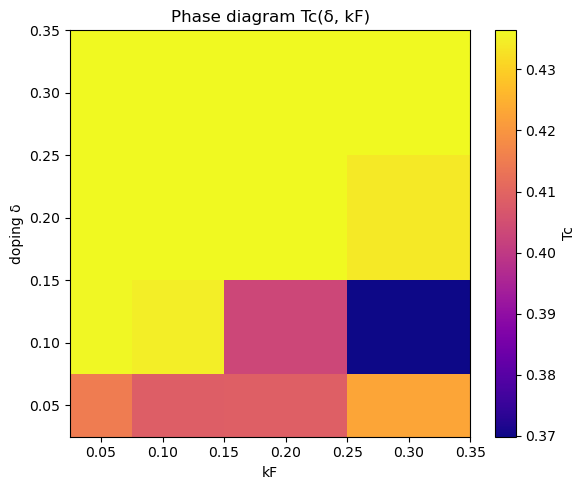

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from lattice import Lattice
from monte_carlo import MonteCarlo

# from auto_tc import sweep_and_Tc   # функцию авто-Tc из предыдущего сообщения

# сетки параметров
dopings = [0.05, 0.1, 0.2, 0.3]
kF_values =  [0.05, 0.1, 0.2, 0.3]

rows, cols = 10, 10   # размер решётки
J0 = -1.0

T_grid = np.linspace(0.5, 60.0, 40)

Tc_map = np.zeros((len(dopings), len(kF_values)))

for i, δ in enumerate(dopings):
    for j, kf in enumerate(kF_values):
        print(f"\n=== δ={δ}, kF={kf} ===")
        lat = Lattice(rows, cols, doping=δ, kf=kf, J0=J0)
        mc = MonteCarlo(lat)

        res = sweep_and_Tc(mc, T_grid,
                           steps_warm=2000,
                           steps_prod=5000,
                           method="wolff",
                           qn=64)
        Tc_map[i, j] = res["Tc_est"]
        print(f"Order={res['order']}, Tc≈{res['Tc_est']:.3f}")

# ----------- построение фазовой диаграммы -----------
X, Y = np.meshgrid(kF_values, dopings)

plt.figure(figsize=(6,5))
c = plt.pcolormesh(X, Y, Tc_map, shading="auto", cmap="plasma")
plt.colorbar(c, label="Tc")
plt.xlabel("kF")
plt.ylabel("doping δ")
plt.title("Phase diagram Tc(δ, kF)")
plt.tight_layout()
plt.show()


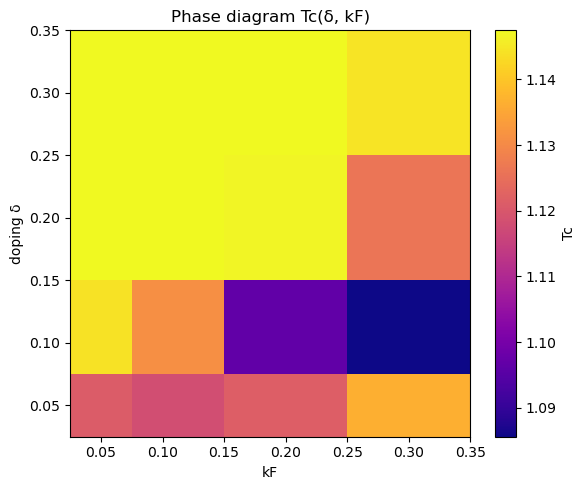

In [25]:
X, Y = np.meshgrid(kF_values, dopings)

plt.figure(figsize=(6,5))
c = plt.pcolormesh(X, Y, Tc_map, shading="auto", cmap="plasma")
plt.colorbar(c, label="Tc")
plt.xlabel("kF")
plt.ylabel("doping δ")
plt.title("Phase diagram Tc(δ, kF)")
plt.tight_layout()
plt.show()


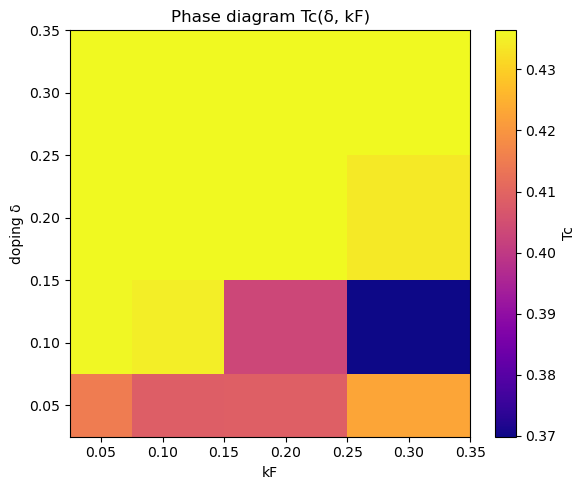

In [4]:
X, Y = np.meshgrid(kF_values, dopings)

plt.figure(figsize=(6,5))
c = plt.pcolormesh(X, Y, Tc_map, shading="auto", cmap="plasma")
plt.colorbar(c, label="Tc")
plt.xlabel("kF")
plt.ylabel("doping δ")
plt.title("Phase diagram Tc(δ, kF)")
plt.tight_layout()
plt.show()


In [6]:
# def sweep_and_Tc(mc, T_grid, steps_warm=2000, steps_prod=6000, method="wolff",
#                  qn=64, outdir="susc_plots", tag="", doping=None, kf=None):
#     lat = mc.lattice
#     N = lat.N

#     Chi = []
#     Chi_q = []

#     # порядок и q* по низкой T
#     T_low = float(np.min(T_grid))
#     mc.acc.correlation_matrix[:] = 0.0
#     mc.run_loop(steps_warm, steps_prod, T_low, method=method, save_warmup=False)
#     corr_low = mc.acc.correlation_matrix / steps_prod
#     order, qstar, (qx,qy,S)= detect_order_qstar(lat, corr_low, qn=qn)

#     # qx = qy = None
#     ix = iy = None
#     for T in T_grid:
#         mc.acc.correlation_matrix[:] = 0.0
#         mc.run_loop(0, steps_prod, T, method=method, save_warmup=False)
#         M = np.asarray(mc.acc.magnetization, float)
#         chi_T = (N / T) * (np.mean(M**2) - np.mean(M)**2)
#         Chi.append(chi_T)

#         if order == "AFM":
#             corr = mc.acc.correlation_matrix / steps_prod
#             if qx is None:
#                 qx, qy, _ = structure_factor_from_corr(lat, corr, qn=qn)
#                 ix = np.argmin(np.abs(qx - qstar[0]))
#                 iy = np.argmin(np.abs(qy - qstar[1]))
#             _, _, S = structure_factor_from_corr(lat, corr, qn=qn)
#             Chi_q.append(S[ix, iy] / T)

#     Chi   = np.array(Chi, float)
#     Chi_q = np.array(Chi_q, float) if order == "AFM" else None

#     if order == "FM":
#         Tc_est = peak_T_parabolic(np.array(T_grid, float), Chi)
#         used = ("chi", Chi)
#     else:
#         Tc_est = peak_T_parabolic(np.array(T_grid, float), Chi_q)
#         used = ("chi_q", Chi_q)

#     # подпись для картинок
#     label = f"δ={doping}, kF={kf}, N={lat.N}"
#     fname_tag = f"d{doping:.2f}_kF{kf:.2f}".replace("None","")

#     # if order == "FM":
#     #     save_susc_plot(T_grid, Chi, f"FM χ(T), Tc≈{Tc_est:.3f}\n{label}",
#     #                    os.path.join(outdir, f"chi_{fname_tag}.png"))
#     # else:
#     #     save_susc_plot(T_grid, Chi,   f"AFM bulk χ(T)\n{label}",
#     #                    os.path.join(outdir, f"chi_bulk_{fname_tag}.png"))
#     #     save_susc_plot(T_grid, Chi_q, f"AFM χ_q*(T), Tc≈{Tc_est:.3f}\n{label}",
#     #                    os.path.join(outdir, f"chi_qstar_{fname_tag}.png"))

#     return {
#         "order": order,
#         "qstar": qstar,
#         "Tc_est": Tc_est,
#         "chi_T": Chi,
#         "chi_q_T": Chi_q,
#         "series_used": used,
#     }

import numpy as np
import os

def sweep_and_Tc(mc, T_grid, steps_warm=2000, steps_prod=6000, method="wolff",
                 qn=64, outdir="susc_plots", tag="", doping=None, kf=None):
    lat = mc.lattice
    N   = lat.N

    Chi   = []
    Chi_q = []

    # 1) Определяем порядок и q* на низкой T
    T_low = float(np.min(T_grid))
    mc.acc.correlation_matrix[:] = 0.0
    mc.run_loop(steps_warm, steps_prod, T_low, method=method, save_warmup=False)
    corr_low = mc.acc.correlation_matrix / steps_prod

    # detect_order_qstar теперь возвращает и сетку q
    order, qstar, (qx, qy, S_low) = detect_order_qstar(lat, corr_low, qn=qn)

    # заранее найдём индексы узла сетки, ближайшие к q*
    if order == "AFM":
        ix = int(np.argmin(np.abs(qx - qstar[0])))
        iy = int(np.argmin(np.abs(qy - qstar[1])))

    # 2) Проход по T
    for T in T_grid:
        mc.acc.correlation_matrix[:] = 0.0
        mc.run_loop(0, steps_prod, T, method=method, save_warmup=False)

        # χ(T) = N/T ( <M^2> - <M>^2 )
        M = np.asarray(mc.acc.magnetization, float)
        chi_T = (N / T) * (np.mean(M**2) - np.mean(M)**2)
        Chi.append(chi_T)

        if order == "AFM":
            # χ_q*(T) ≈ S(q*) / T
            corr = mc.acc.correlation_matrix / steps_prod
            _, _, S = structure_factor_from_corr(lat, corr, qn=qn)
            Chi_q.append(S[ix, iy] / T)

    Chi = np.array(Chi, float)
    Chi_q = np.array(Chi_q, float) if order == "AFM" else None

    # 3) Оценка Tc по правильной кривой
    if order == "FM":
        Tc_est = peak_T_parabolic(np.array(T_grid, float), Chi)
        used = ("chi", Chi)
    else:
        Tc_est = peak_T_parabolic(np.array(T_grid, float), Chi_q)
        used = ("chi_q", Chi_q)

    # (опционально) титры для сохранения графиков
    label = f"δ={doping:.2f}, kF={kf:.2f}, N={lat.N}" if (doping is not None and kf is not None) \
            else f"N={lat.N}"
    fname_tag = f"d{doping:.2f}_kF{kf:.2f}" if (doping is not None and kf is not None) else tag

    # если нужно — раскомментируй сохранение
    # if order == "FM":
    #     save_susc_plot(T_grid, Chi, f"FM χ(T), Tc≈{Tc_est:.3f}\n{label}",
    #                    os.path.join(outdir, f"chi_{fname_tag}.png"))
    # else:
    #     save_susc_plot(T_grid, Chi,   f"AFM bulk χ(T)\n{label}",
    #                    os.path.join(outdir, f"chi_bulk_{fname_tag}.png"))
    #     save_susc_plot(T_grid, Chi_q, f"AFM χ_q*(T), Tc≈{Tc_est:.3f}\n{label}",
    #                    os.path.join(outdir, f"chi_qstar_{fname_tag}.png"))

    return {
        "order": order,
        "qstar": qstar,
        "Tc_est": Tc_est,
        "chi_T": Chi,
        "chi_q_T": Chi_q,
        "series_used": used,
    }



In [16]:
import numpy as np
import matplotlib.pyplot as plt
from lattice import Lattice
from monte_carlo import MonteCarlo

dopings   = [0.05, 0.10, 0.20, 0.30]
kF_values = [0.05, 0.10, 0.20, 0.30]
rows, cols = 20, 20
J0 = -1.0
T_grid = np.linspace(1, 30.0, 30)

Tc_map = np.zeros((len(dopings), len(kF_values)))
order_map = np.empty((len(dopings), len(kF_values)), dtype=object)

for i, δ in enumerate(dopings):
    for j, kf in enumerate(kF_values):
        lat = Lattice(rows, cols, doping=δ, kf=kf, J0=J0)
        mc  = MonteCarlo(lat)
        res = sweep_and_Tc(
            mc, T_grid,
            steps_warm=1500, steps_prod=5000,
            method="wolff", qn=64,
            outdir="susc_plots",
            doping=float(δ), kf=float(kf)   # ← всегда передавать
        )

        Tc_map[i, j] = res["Tc_est"]
        order_map[i, j] = res["order"]
        print(f"δ={δ:.2f}, kF={kf:.2f}: {res['order']}, Tc≈{res['Tc_est']:.3f}")


Starting warmup phase...


100%|██████████| 1500/1500 [00:00<00:00, 7016.40it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7534.34it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 10071.63it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 9488.03it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 9142.59it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 8779.63it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 8046.51it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7942.67it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7499.47it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7517.31it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7231.24it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7294.14it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7311.64it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7389.71it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7538.88it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7604.63it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 8449.08it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 8898.17it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 9744.18it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 10392.76it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 11218.59it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 11714.30it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 12752.37it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 13372.95it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 14129.02it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 14685.39it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 14711.55it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 16174.45it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 16340.05it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 17182.77it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 16534.15it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 17670.02it/s]


δ=0.05, kF=0.05: AFM, Tc≈0.722
Starting warmup phase...


100%|██████████| 1500/1500 [00:00<00:00, 10495.05it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 9840.06it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 9586.55it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 8590.68it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7944.61it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7583.76it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7355.33it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7066.57it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7323.04it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 8118.08it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 9049.33it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 10549.78it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 11501.38it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 13985.07it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 14461.27it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 14506.47it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 16415.23it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 17526.96it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 18354.40it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 18600.30it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 19274.99it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 20231.98it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 18922.57it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 17825.97it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 21270.63it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 21081.46it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 21554.55it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 22046.74it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 21246.58it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 21142.73it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 20917.72it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 20954.02it/s]


δ=0.05, kF=0.10: AFM, Tc≈0.722
Starting warmup phase...


100%|██████████| 1500/1500 [00:00<00:00, 7681.77it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7344.26it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7093.05it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7836.78it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 11243.29it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 14969.76it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 17417.79it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 19186.35it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 20077.01it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 20123.38it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 22546.87it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 22753.70it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 22692.28it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 21571.75it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 21994.81it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 24630.88it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 24355.81it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 23229.99it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 23555.49it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 24393.18it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 24288.70it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 24715.24it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 22382.68it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 21901.68it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 22173.88it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 23413.79it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 23163.15it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 21191.17it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 22191.85it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 23266.30it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 25874.98it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 24733.40it/s]


δ=0.05, kF=0.20: AFM, Tc≈0.581
Starting warmup phase...


100%|██████████| 1500/1500 [00:00<00:00, 8527.20it/s]

Starting production phase...



100%|██████████| 5000/5000 [00:00<00:00, 8022.91it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7832.58it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 14454.21it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 19143.45it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 20703.80it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 21393.53it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 21679.06it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 21233.84it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 23358.79it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 24433.36it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 23773.95it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 24898.22it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 26092.81it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 24433.16it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 24609.09it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 24412.26it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 26836.13it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 24099.18it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 23863.68it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 24188.63it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 24448.97it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 24694.22it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 25731.61it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 27227.01it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 27437.96it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 26386.74it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 23916.83it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 22816.09it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 25432.85it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 23434.72it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 24553.45it/s]


δ=0.05, kF=0.30: AFM, Tc≈0.599
Starting warmup phase...


100%|██████████| 1500/1500 [00:00<00:00, 4384.70it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4270.47it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4204.86it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4046.83it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3911.95it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3717.43it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3574.40it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3477.90it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3379.70it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3234.87it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3010.09it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 2971.85it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 2935.67it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 2884.98it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 2806.14it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 2721.76it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 2678.75it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 2643.12it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 2561.98it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 2552.26it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 2513.68it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 2501.14it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 2443.42it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 2420.81it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 2403.17it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 2410.72it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 2408.71it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 2394.57it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 2414.24it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 2456.29it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 2548.69it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 2635.95it/s]


δ=0.10, kF=0.05: AFM, Tc≈0.722
Starting warmup phase...


100%|██████████| 1500/1500 [00:00<00:00, 4199.33it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4142.86it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4012.25it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3751.09it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3456.59it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3252.06it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3115.74it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 2942.65it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 2792.71it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 2676.16it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 2554.74it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 2524.01it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 2462.96it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 2378.68it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 2413.01it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 2410.86it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 2422.14it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 2559.40it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 2703.90it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 2901.61it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3382.16it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3811.16it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4254.93it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4859.34it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 5316.18it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 6079.77it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 6491.27it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7197.96it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7825.32it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 8362.59it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 8669.18it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 8946.13it/s]


δ=0.10, kF=0.10: AFM, Tc≈0.722
Starting warmup phase...


100%|██████████| 1500/1500 [00:00<00:00, 3161.51it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3153.01it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3124.66it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 2624.01it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 2362.99it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 2390.30it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 2695.09it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3481.47it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4663.33it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 6025.04it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7368.54it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 8916.98it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 9488.98it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 10684.48it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 11363.72it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 12448.72it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 13023.89it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 13615.90it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 13246.85it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 14465.71it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 14547.00it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 14984.10it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 14381.82it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 15391.50it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 15611.99it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 15701.70it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 15858.32it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 15679.10it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 16257.41it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 16069.00it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 15884.66it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 16355.11it/s]


δ=0.10, kF=0.20: AFM, Tc≈0.710
Starting warmup phase...


100%|██████████| 1500/1500 [00:00<00:00, 2545.89it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 2539.57it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 2516.31it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 2402.07it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3429.22it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 5783.16it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 8324.36it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 10365.19it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 11898.42it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 13063.78it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 13696.11it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 14038.21it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 15492.67it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 15498.87it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 15160.91it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 15636.78it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 16412.48it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 16250.34it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 16846.58it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 16394.04it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 16822.75it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 16449.24it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 17293.37it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 17162.62it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 16420.78it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 17241.85it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 18303.09it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 17541.32it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 17450.24it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 18129.21it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 17933.39it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 17891.62it/s]


δ=0.10, kF=0.30: AFM, Tc≈0.600
Starting warmup phase...


100%|██████████| 1500/1500 [00:01<00:00, 1245.10it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:04<00:00, 1224.72it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:04<00:00, 1218.66it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:04<00:00, 1203.82it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:04<00:00, 1165.89it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:04<00:00, 1130.96it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:04<00:00, 1114.52it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:04<00:00, 1087.19it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:04<00:00, 1062.05it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:04<00:00, 1039.16it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:04<00:00, 1014.35it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:05<00:00, 994.43it/s] 


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:05<00:00, 976.24it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:05<00:00, 934.17it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:05<00:00, 943.65it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:05<00:00, 909.32it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:05<00:00, 902.62it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:05<00:00, 882.93it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:05<00:00, 869.92it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:05<00:00, 856.03it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:05<00:00, 839.76it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:06<00:00, 829.26it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:06<00:00, 813.03it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:06<00:00, 797.30it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:06<00:00, 788.61it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:06<00:00, 772.00it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:06<00:00, 759.39it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:06<00:00, 753.11it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:06<00:00, 733.08it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:06<00:00, 727.44it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:06<00:00, 719.75it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:07<00:00, 707.02it/s]


δ=0.20, kF=0.05: AFM, Tc≈0.722
Starting warmup phase...


100%|██████████| 1500/1500 [00:01<00:00, 1225.98it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:04<00:00, 1207.47it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:04<00:00, 1200.80it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:04<00:00, 1144.11it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:04<00:00, 1091.21it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:04<00:00, 1036.34it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:04<00:00, 1008.01it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:05<00:00, 957.86it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:05<00:00, 934.59it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:05<00:00, 906.42it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:05<00:00, 864.50it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:05<00:00, 839.95it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:06<00:00, 811.31it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:06<00:00, 777.98it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:06<00:00, 763.42it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:06<00:00, 743.76it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:06<00:00, 721.32it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:07<00:00, 701.89it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:07<00:00, 684.41it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:07<00:00, 674.38it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:07<00:00, 654.97it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:07<00:00, 652.00it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:07<00:00, 634.40it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:08<00:00, 624.08it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:08<00:00, 609.68it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:08<00:00, 609.77it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:08<00:00, 600.94it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:08<00:00, 593.08it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:08<00:00, 589.66it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:08<00:00, 586.64it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:08<00:00, 585.21it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:08<00:00, 586.20it/s]


δ=0.20, kF=0.10: AFM, Tc≈0.722
Starting warmup phase...


100%|██████████| 1500/1500 [00:01<00:00, 886.42it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:05<00:00, 895.18it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:05<00:00, 904.34it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:06<00:00, 818.10it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:07<00:00, 678.17it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:07<00:00, 630.79it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:08<00:00, 597.18it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:08<00:00, 574.49it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:09<00:00, 545.12it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:09<00:00, 554.46it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:09<00:00, 551.44it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:08<00:00, 587.83it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:07<00:00, 668.88it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:05<00:00, 842.08it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:04<00:00, 1116.90it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:03<00:00, 1431.43it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:03<00:00, 1564.41it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 2224.03it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 2630.53it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 2995.97it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3413.23it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3725.87it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3758.94it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4177.71it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4955.64it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 5124.16it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 5393.26it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 5679.62it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 6031.85it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 6090.44it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 6115.35it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 6627.49it/s]


δ=0.20, kF=0.20: AFM, Tc≈0.627
Starting warmup phase...


100%|██████████| 1500/1500 [00:01<00:00, 782.10it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:06<00:00, 810.23it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:06<00:00, 810.97it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:07<00:00, 633.35it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:09<00:00, 524.89it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:09<00:00, 501.57it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:08<00:00, 573.68it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:07<00:00, 643.54it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:05<00:00, 912.96it/s] 


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 1671.71it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 2489.11it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3080.05it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3720.50it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4268.04it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4609.51it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 5093.59it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 5329.94it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 5618.60it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 6164.66it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 5856.86it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 5461.19it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7104.00it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 6531.85it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 6692.87it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 6856.16it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7323.42it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 6957.41it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7082.42it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 6740.59it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 6787.20it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7714.72it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 7262.91it/s]


δ=0.20, kF=0.30: AFM, Tc≈1.818
Starting warmup phase...


100%|██████████| 1500/1500 [00:02<00:00, 506.43it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:09<00:00, 515.51it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:09<00:00, 518.31it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:09<00:00, 501.67it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:10<00:00, 488.04it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:10<00:00, 484.34it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:10<00:00, 457.05it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:10<00:00, 468.83it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:10<00:00, 461.92it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:11<00:00, 448.47it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:11<00:00, 441.35it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:11<00:00, 444.94it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:11<00:00, 443.09it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:11<00:00, 431.71it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:11<00:00, 420.76it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:11<00:00, 419.92it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:12<00:00, 407.67it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:12<00:00, 411.11it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:12<00:00, 402.87it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:12<00:00, 392.21it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:12<00:00, 390.11it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:13<00:00, 382.21it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:13<00:00, 379.82it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:13<00:00, 377.51it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:13<00:00, 368.25it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:13<00:00, 362.37it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:13<00:00, 357.83it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:14<00:00, 347.42it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:14<00:00, 343.76it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:14<00:00, 339.99it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:13<00:00, 369.98it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:13<00:00, 376.35it/s]


δ=0.30, kF=0.05: AFM, Tc≈0.722
Starting warmup phase...


100%|██████████| 1500/1500 [00:02<00:00, 578.19it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:08<00:00, 583.21it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:08<00:00, 582.61it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:09<00:00, 537.30it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:09<00:00, 523.25it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:09<00:00, 513.77it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:10<00:00, 490.21it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:10<00:00, 483.95it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:10<00:00, 468.02it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:11<00:00, 420.42it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:12<00:00, 389.07it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:13<00:00, 382.02it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:14<00:00, 345.82it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:13<00:00, 359.95it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:13<00:00, 360.71it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:14<00:00, 348.08it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:14<00:00, 348.67it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:14<00:00, 337.08it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:15<00:00, 324.61it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:17<00:00, 292.56it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:16<00:00, 298.67it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:16<00:00, 294.25it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:17<00:00, 293.56it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:17<00:00, 293.45it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:15<00:00, 321.57it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:16<00:00, 312.17it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:16<00:00, 303.54it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:16<00:00, 301.16it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:17<00:00, 286.82it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:16<00:00, 296.03it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:17<00:00, 286.64it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:18<00:00, 265.75it/s]


δ=0.30, kF=0.10: AFM, Tc≈0.722
Starting warmup phase...


100%|██████████| 1500/1500 [00:03<00:00, 427.01it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:11<00:00, 423.76it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:11<00:00, 434.42it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:12<00:00, 394.22it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:12<00:00, 406.40it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:13<00:00, 374.42it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:14<00:00, 349.61it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:15<00:00, 318.65it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:16<00:00, 304.56it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:17<00:00, 292.68it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:17<00:00, 278.10it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:19<00:00, 262.24it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:19<00:00, 262.25it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:19<00:00, 255.43it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:19<00:00, 250.31it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:19<00:00, 252.84it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:19<00:00, 251.25it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:19<00:00, 259.46it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:17<00:00, 291.14it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:14<00:00, 348.81it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:12<00:00, 400.93it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:09<00:00, 503.22it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:08<00:00, 607.42it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:06<00:00, 760.47it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:05<00:00, 940.23it/s] 


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:04<00:00, 1089.19it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:03<00:00, 1361.81it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:03<00:00, 1518.50it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 1777.74it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 2019.84it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 1866.39it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 2245.26it/s]


δ=0.30, kF=0.20: AFM, Tc≈0.554
Starting warmup phase...


100%|██████████| 1500/1500 [00:03<00:00, 384.97it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:12<00:00, 390.31it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:12<00:00, 400.88it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:14<00:00, 334.85it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:17<00:00, 290.87it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:18<00:00, 265.52it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:20<00:00, 247.60it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:20<00:00, 241.57it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:19<00:00, 262.07it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:17<00:00, 287.45it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:13<00:00, 365.20it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:09<00:00, 509.04it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:06<00:00, 729.33it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:04<00:00, 1006.93it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:03<00:00, 1402.79it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 1830.77it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:02<00:00, 2181.04it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 2557.97it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 2868.17it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3199.88it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3414.72it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3761.36it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 3878.08it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4145.95it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4339.38it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4469.58it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4706.98it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4832.70it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:01<00:00, 4813.22it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 5119.75it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 5268.37it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 5000/5000 [00:00<00:00, 5412.10it/s]


δ=0.30, kF=0.30: AFM, Tc≈0.950


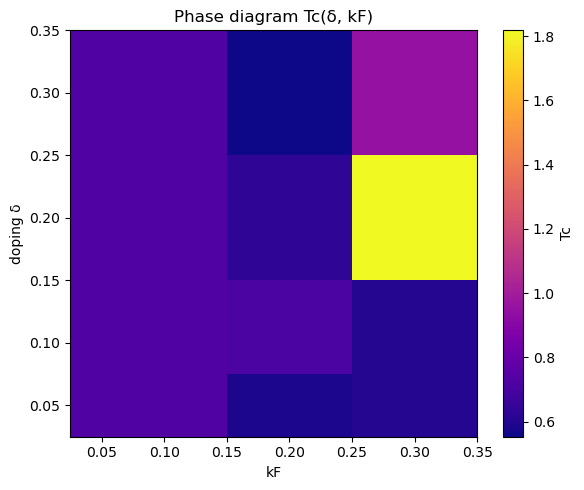

In [17]:

X, Y = np.meshgrid(kF_values, dopings)
plt.figure(figsize=(6,5))
pc = plt.pcolormesh(X, Y, Tc_map, shading="auto", cmap="plasma")
plt.colorbar(pc, label="Tc")
plt.xlabel("kF"); plt.ylabel("doping δ")
plt.title("Phase diagram Tc(δ, kF)")
plt.tight_layout(); plt.show()


Starting warmup phase...


100%|██████████| 3/3 [00:00<00:00, 1778.75it/s]


Starting production phase...


100%|██████████| 8/8 [00:00<00:00, 341.50it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 8/8 [00:00<00:00, 374.62it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 8/8 [00:00<00:00, 167.71it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 8/8 [00:00<00:00, 97.86it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 8/8 [00:00<00:00, 114.31it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 8/8 [00:00<00:00, 109.22it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 8/8 [00:00<00:00, 114.29it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 8/8 [00:00<00:00, 114.68it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 8/8 [00:00<00:00, 115.11it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 8/8 [00:00<00:00, 128.77it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 8/8 [00:00<00:00, 117.54it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 8/8 [00:00<00:00, 116.37it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 8/8 [00:00<00:00, 97.45it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 8/8 [00:00<00:00, 104.04it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 8/8 [00:00<00:00, 145.31it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 8/8 [00:00<00:00, 191.48it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 8/8 [00:00<00:00, 206.45it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 8/8 [00:00<00:00, 357.38it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 8/8 [00:00<00:00, 312.21it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 8/8 [00:00<00:00, 313.18it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 8/8 [00:00<00:00, 282.40it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 8/8 [00:00<00:00, 342.66it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 8/8 [00:00<00:00, 340.13it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 8/8 [00:00<00:00, 333.57it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 8/8 [00:00<00:00, 353.92it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 8/8 [00:00<00:00, 397.25it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 8/8 [00:00<00:00, 363.14it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 8/8 [00:00<00:00, 357.24it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 8/8 [00:00<00:00, 351.76it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 8/8 [00:00<00:00, 369.48it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 8/8 [00:00<00:00, 343.26it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 8/8 [00:00<00:00, 341.98it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 8/8 [00:00<00:00, 386.37it/s]


Starting warmup phase...


0it [00:00, ?it/s]


Starting production phase...


100%|██████████| 8/8 [00:00<00:00, 368.69it/s]


TypeError: Figure.savefig() takes 2 positional arguments but 3 were given

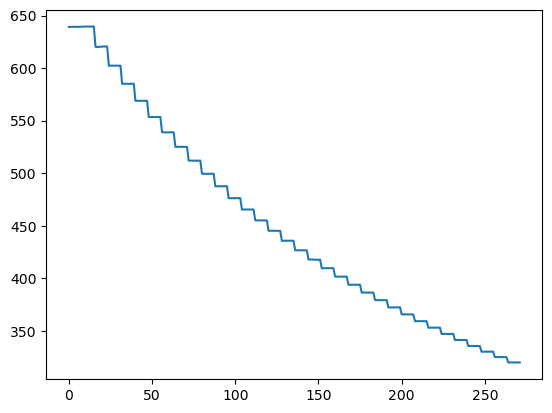

In [ ]:
import numpy as np
from monte_carlo import MonteCarlo
from ising_lattice import IsingLattice

# Используем твой класс решётки из сообщения
# from ising_lattice import IsingLattice   # если вынесешь в файл
# Здесь предполагаем, что IsingLattice уже определён в ноутбуке

# ВАЖНО: берем сетку температур вокруг Tc(2D Ising) ~ 2.269
T_grid = np.linspace(1.6, 3.2, 33)  # достаточно плотная сетка

def run_ising_case(L=32, J=+1.0, method="wolff", tag="ising"):
    # 1) решётка + MC
    lat = IsingLattice(L, L, J=J)
    mc  = MonteCarlo(lat)

    # 2) прогон твоей функции БЕЗ изменений
    res = sweep_and_Tc(
        mc, T_grid,
        steps_warm=3, steps_prod=8,
        method=method, qn=64,
        outdir="susc_plots",
        tag=tag,

        doping=1.0, kf=float(J)
    )
    plt.plot(mc.acc.susceptibility)
    plt.savefig(str(J),'png')

    print(f"[{tag}] J={J:+.1f}, method={method} → order={res['order']}, Tc≈{res['Tc_est']:.4f}")
    return res

res_fm = run_ising_case(L=32, J=+1.0, method="wolff", tag="ising_FM")

res_afm = run_ising_case(L=32, J=-1.0, method="metropolis", tag="ising_AFM")
